<div class="alert alert-block alert-info" background: linear-gradient(90deg, #8360c3, #2ebf91);>
    <span style="color: blue;" font-family:'Arial';">
        <h1>
            <center>
                Projet 10 - Développer une preuve de concept
            </center>
        </h1>
    </span>
</div>

---

## <a> <center><big> Sommaire </center></big></a>

## <a href="#C1"> Présentation du Projet</a>

## <a href="#C2">Partie 1 : Faisabilité de classification automatique d’images</a>

- <a href="#C3">I - Collecte du jeu de données via l'API Yelp</a>
- <a href="#C4">I - Classification automatique d’images via SIFT</a>
- <a href="#C5">II - Classification automatique d’images via CNN Transfer Learning</a>

## <a href="#C6">Partie 2 : Modèle de classification des images</a>

- <a href="#C7">I - Étude des Données</a>
- <a href="#C8">II - Modèle de classification : VGG16</a>
- <a href="#C9">III - Feature Importance</a>

## <a href="#C10">Partie 3 : Modèle VGG16 face aux Attaques Adverses</a>

- <a href="#C11">I - Concept des Attaques Adverses</a>
- <a href="#C12">II - Mise en place d'Attaques Adverses</a>
- <a href="#C13">III - Entrainement du VGG16 contre les Attaques adverses</a>

## <a href="#C14"> Conclusion </a>
    
<br></br>
___

## <div class="alert alert-block alert-info"><a name="C1"><center> Présentation du Projet</a></center></div>

<h4><span style = "color: blue">Historique Précédente Mission</span></h4> 

Nous avons travaillé dans une précédente mission en tant qu'<span style = "color: blueF">Ingénieur IA</span> au sein de la startup <span style = "color: blue">“Avis Restau”</span> qui met en relation des clients et des restaurants. Nous avons été missionné pour <span style = "color: blue">améliorer la plateforme</span> avec une nouvelle <span style = "color: blue">fonctionnalité de collaboration</span>: Les utilisateurs pourront <span style = "color: blue">poster des photos</span> sur leurs restaurants préférés.

Nous devions étudier la <span style = "color: blue">possibilité de classifier les images</span> postées par les clients en 5 catégories: Inside, Outside, Food, Drink, Menu. Nous allons revoir cette démarche dans la <span style = "color: blueF">première partie</span>.
    
<h4><span style = "color: blue">Mise en place de la preuve de concept</span></h4> 

<h5><span style = "color: darkgreen">Sujet d'étude</span></h5> 

Nous souhaiterions étudier les <span style = "color: blue">Attaques Adverses</span> qui sont un phénomène relativement <span style = "color: blue">récent</span>, apparu au cours des dernières années dans le <span style = "color: blue">Deep Learning</span> amenant ainsi une <span style = "color: blue">recherche active sur les techniques de défense</span> contre ces attaques car elles peuvent avoir de <span style = "color: blue">fortes conséquences</span> dans plusieurs domaines.
        
<h5><span style = "color: darkgreen">Préparation de la baseline</span></h5> 

Nous savions qu’il etait possible de <span style = "color: blue">classifier automatiquement notre dataset d'images</span> par catégorie. Nous avons alors décidé d’utiliser le <span style = "color: blue">modèle de classification d’images</span> (VGG-16) qui permettra de <span style = "color: blue">prédire les catégories associées aux images</span>. Ce modèle servira de <span style = "color: blue">baseline</span> à notre projet.

<h5><span style = "color: darkgreen">Étude des Attaques adverses</span></h5> 

Nous allons <span style = "color: blue">définir</span>, <span style = "color: blue">créer</span> et <span style = "color: blue">tester</span> des attaques adverses sur notre modèle afin d'étudier <span style = "color: blue">l'impact de ces attaques sur la classification des images</span> d'Avis Restau.  
    
<h4><span style = "color: blue">Objectif du concept</span></h4> 

L'objectif du concept est <span style = "color: blue">d'évaluer comment évolue un modèle de classification d'images face aux attaques adverses</span>. Nous mettrons en place cette évaluation et nous allons essayer de <span style = "color: blue">rendre le modèle robuste</span> à ces attaques. Nous terminerons par une <span style = "color: blue">discussion sur nos résultats</span>.

-----

## <div class="alert alert-block alert-info"><a name="C2"><center> Partie 1 - Faisabilité de classification automatique d’images </a></center></div>

L'objectif du projet etait de **détecter les sujets d’insatisfaction** et **labelliser automatiquement les photos** postées. Voici les différentes **étapes que nous allons réaliser**:

- **Collecter un échantillon de données** via l’API Yelp  pour s’assurer de la possibilité de collecter de nouvelles données.
- **Analyser les photos** pour déterminer les catégories des photos.


<a name="C3"><h2><span style = "color : blue">I. Collecte du jeu de données</span></h2></a>

Nous commencerons par importer toutes les bibliothèques nécessaires dans le cadre de notre projet.

In [71]:
!pip install numpy pandas seaborn matplotlib tensorflow
!pip install pyarrow
!pip install opencv-python pillow scikit-learn
!pip install scikit-image

In [72]:
#CV2
import cv2

# OS
import os

###############################
           # API #
###############################

# Pour les requêtes
import requests
import json

#Random
import random

#Collections
from collections import Counter

# numpy et pandas pour la manipulation des données 
import numpy as np
import pandas as pd 

# matplotlib et Seaborn pour l'affichage 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

# PIL pour le prétraitement des images 
from PIL import Image
from PIL import ImageOps
from PIL import ImageFilter
import shutil
from skimage.io import imread

#SIFT pour les keypoints et descripteurs
from cv2 import SIFT_create

#Sklearn pour la réduction de dimension, le clustering et les métriques
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans, KMeans
from sklearn.metrics import confusion_matrix, adjusted_rand_score, accuracy_score
from sklearn.preprocessing import LabelEncoder


#Tensorflow pour les modèles deep learning 
import tensorflow
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, load_model
from tensorflow.image import per_image_standardization
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img
from tensorflow import GradientTape, convert_to_tensor, sign, reduce_sum, reduce_mean, multiply

###

from tensorflow.keras import Model
from tensorflow.keras import backend as K



Dans ce qui suit, nous allons **collecter $1000$ Restaurants** ainsi que des **reviews associées** à ces restaurants via <span style = "color : blue">l'API Yelp</span>:

- Nous ferons une requête à l'API Yelp par un <span style = "color : blue">Business Search</span> en utilisant une clé personnelle d'accès. 
- La récupération des restaurants peut se faire seulement que par paquets de 50 à la fois, nous utiliserons un `offset` pour récupérer les $200$ restaurants attendus.
- Nous filtrerons les restaurants de <span style = "color : blue">"New York" ouverts</span> et dans un <span style = "color : blue">rayon de $10$km</span>.

<a name="C6"><h2><big><span style = "color : blue">I - Collecte des données JSON</span></big></h2>

<h3><span style = "color : darkgreen">1. Collecte des "Restaurants"</span></h3>

Nous allons collecter le dataset `"yelp_academic_dataset_business"` qui contient les données commerciales telles que:

- <span style = "color : blue">"business_id":</span> Id du restaurant $\rightarrow$ `"string"` unique de $22$ caractères.

- <span style = "color : blue">"name":</span> Nom du restaurant $\rightarrow$ `"string"`
   
- <span style = "color : blue">"city":</span> ville du restaurant $\rightarrow$ `"string"`
      
- <span style = "color : blue">"is_open":</span> Si le restaurant est ouvert $\rightarrow$ `"integer"`,repectivement 0 ou 1 pour closed ou open.
    
Nous allons ensuite récupérer un échantillon de <span style = "color : red">1000 restaurants</span> **ouverts** à **Philadelphia**.

---
<div class = "alert alert-block alert-info"><big><center><span style = "color : blue"><b> La classification SIFT (Scale-Invariant Feature Transform) </span></b></center></big></br>


La classification SIFT est une technique utilisée en traitement d'images et en vision par ordinateur pour **détecter et classifier des objets ou des caractéristiques dans des images**. Le SIFT est particulièrement utile lorsque vous avez besoin de trouver des correspondances entre des objets ou des points d'intérêt dans des images, même si ces objets ont des rotations, des échelles ou des variations d'éclairage différentes. Voici une explication étape par étape de la classification SIFT:</br>

-<span style = "color : green"> 1. Extraction des caractéristiques SIFT</span></br>
        -       Dans la première étape, des points d'intérêt clés sont extraits de l'image. Ces points sont choisis en fonction de leur stabilité par rapport aux transformations telles que la rotation et l'échelle. Pour chaque point d'intérêt, une région autour de ce point est extraite pour créer une petite fenêtre.</br>
        -       Dans chacune de ces fenêtres, des descripteurs SIFT sont calculés. Les descripteurs SIFT sont des vecteurs numériques qui capturent les informations locales sur la texture et la structure de la région entourant le point d'intérêt. Ils sont robustes aux variations d'éclairage et de contraste.</br>

-<span style = "color : green"> 2. Construction d'une base de données de caractéristiques</span></br>
       - Pour classer les images, vous devez d'abord construire une base de données de caractéristiques en extrayant les caractéristiques SIFT de plusieurs images représentatives de chaque classe que vous souhaitez classifier. Chaque classe aura sa propre base de données de caractéristiques.</br>


-<span style = "color : green"> 3. Classification</span></br>
       - Lorsqu'une nouvelle image doit être classifiée, vous commencez par extraire les caractéristiques SIFT de cette image de test.</br>

-<span style = "color : green"> 4. Correspondance des caractéristiques</span></br>
       - Vous comparez ensuite les descripteurs SIFT de l'image de test avec ceux de chaque classe dans la base de données de caractéristiques. Cela peut se faire **en utilisant des techniques de correspondance**, telles que la recherche des plus proches voisins (k-NN) ou en utilisant des algorithmes plus sophistiqués tels que RANSAC (Random Sample Consensus).

-<span style = "color : green"> 5. Prise de décision</span></br>
       - Une fois que vous avez trouvé les correspondances entre les caractéristiques SIFT de l'image de test et celles des classes dans la base de données, vous pouvez prendre une décision de classification. Par exemple, vous pouvez attribuer la classe à laquelle appartient la majorité des correspondances ou utiliser des **méthodes de vote pondéré**.

-<span style = "color : green"> 6. Évaluation</span></br>
       - Pour évaluer la performance de votre système de classification via SIFT, vous pouvez utiliser des **métriques telles que la précision**, **le rappel** et la **F-mesure** en comparant les résultats de classification avec des étiquettes de classe réelles.</br>
       
Le SIFT est une technique puissante pour la classification d'images, en particulier lorsque les images présentent des variations d'échelle, de rotation, d'illumination et d'occlusion. Cependant, il peut être gourmand en calcul et nécessiter une grande quantité de données d'entraînement pour de bonnes performances. De plus, des techniques plus modernes basées sur des **réseaux de neurones convolutifs (CNN)** ont également montré d'excellentes performances dans la classification d'images et sont devenues plus populaires ces dernières années.</br></br>



</div>


---

<a name="C11"><h2><span style = "color : blue">I - Classification SIFT</span></h2></a>

Les descripteurs SIFT sont couramment utilisés pour la détection et la description de caractéristiques distinctives dans des images, ce qui peut être utile dans le cadre de notre projet pour la labellisation des images.

Nous allons étudier dans cette partie la classification automatique d’images via SIFT, le but étant de faire une étude de faisabilité, un échantillon de $200$ images pour chacune des $5$ catégories d’images (`« label »`) permettront de vérifier la faisabilité de séparer automatiquement les images selon ces catégories.

<h3><span style = "color : darkgreen">1 - Lecture et affichage des données</span></h3>

Nous allons premièrement lire le dataset `"yelp_photo"`. Il contient les données des photos postées telles que:

- <span style = "color : #7F00FF">"business_id":</span> id du restaurant $\rightarrow$ `"string"` unique de $22$ caractères.

- <span style = "color : #7F00FF">"photo_id":</span> id de la photo $\rightarrow$ `"string"` unique de $22$ caractères.

- <span style = "color : #7F00FF">"label":</span> La catégorie à laquelle appartient la photo ("nourriture", "boisson", "menu", "intérieur" ou "extérieur") $\rightarrow$ `"string"`.

In [73]:
def get_photos_dataset(file_review):
    
    #with open(file_review, "r") as file:
    with open(file_review, "r", encoding='utf-8') as file:    
        business_id_list = []
        label = []
        photo_id = []
        
        for index, json_str in enumerate(file):
            photo = json.loads(json_str)
            business_id_list.append(photo["business_id"])
            label.append(photo["label"])
            photo_id.append(photo["photo_id"])
                    
        return pd.DataFrame.from_dict({"business_id" : business_id_list, "photo_id" : photo_id, "label" : label})

Nous allons créer le DataFrame `df_photos` contenant ces informations:

In [74]:
df_photos = get_photos_dataset("yelp_photos/photos.json")
df_photos.head()

business_id                photo_id  label
0  R1sIqGfKpF5f3HV3vyNsbg  Un_Og6jfhazVn7CxszkKEw  drink
1  vdT7zlrLB2DL9pStDUs91A  BFE1AFOs27scnnfeBf99ZA  drink
2  c5GzrObEdj7eNVOdAxrppg  7t-C0r1JRdoVD9FS7M-N7Q  drink
3  aQa7N5ZbPhCoKYGGB-gqfg  rLnw0d-YYZvT9kR4y7h7_Q  drink
4  B-s6qOFD75syhwWjp518aA  Cv5M8MDw8a5NEWvw2AQ4nw  drink

<h3><span style = "color : darkgreen">2 - Sampling des données</span></h3>

Nous allons sélectionner un <span style = "color : blue">sample de $200$ images</span> ($40$ par catégorie).

In [75]:
df_photos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  200000 non-null  object
 1   photo_id     200000 non-null  object
 2   label        200000 non-null  object
dtypes: object(3)
memory usage: 4.6+ MB


In [76]:
photos_sample = df_photos.groupby("label").apply(lambda x: x.sample(40, random_state = 0)).reset_index(drop = True)
photos_sample.head()

C:\Users\kfaiz\AppData\Local\Temp\ipykernel_4440\895278851.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  photos_sample = df_photos.groupby("label").apply(lambda x: x.sample(40, random_state = 0)).reset_index(drop = True)


business_id                photo_id  label
0  97B-ydL9BcO0sXi2mOzW0g  a81enpklPd5L_qWRc4ZQzA  drink
1  b4R-tbgUU0vW74iWswwzyg  AFRPISC9_S0slsUwF7Wmjg  drink
2  ZoFht0viJtWiAt4MeP6zvQ  3wiVGVX-fh0QiWAJCw2OKg  drink
3  WvxxM3eVkRVs0rV-K_mykA  ZntrDOBaXoQL5IXy2zwJKA  drink
4  WkN8Z2Q8gbhjjkCt8cDVxg  2hzZfvZeZX9GEVnjcFOMcw  drink

Nous allons prendre un échantillon de $200$ images ($40$ par catégorie). Nous ferons ensuite un <span style = "color : blue">label encoding</span> afin d'avoir les labels associés à des chiffres.

In [77]:
photos_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  200 non-null    object
 1   photo_id     200 non-null    object
 2   label        200 non-null    object
dtypes: object(3)
memory usage: 4.8+ KB


Vérifions que nous avons bien $40$ photos par catégorie.

In [78]:
pd.DataFrame(photos_sample["label"].value_counts()).T

label  drink  food  interior  menu  outside
count     40    40        40    40       40

<h3><span style = "color : darkgreen">3 - Label Encoding</span></h3>

Nous allons effectuer un <span style = "color : blue">Label Encoding</span> afin d'avoir les labels associés à des chiffres.

In [79]:
# Dictionnaire de correspondance entre Label et Id 
label2id = {"interior": 0, "outside": 1, "food": 2, "drink": 3, "menu": 4}

# Dictionnaire de correspondance entre Id et Label
id2label = {value : key for key, value in label2id.items()}

# Label Encoding 
photos_sample["label_num"] = photos_sample["label"].map(label2id)
photos_sample.head()

business_id                photo_id  label  label_num
0  97B-ydL9BcO0sXi2mOzW0g  a81enpklPd5L_qWRc4ZQzA  drink          3
1  b4R-tbgUU0vW74iWswwzyg  AFRPISC9_S0slsUwF7Wmjg  drink          3
2  ZoFht0viJtWiAt4MeP6zvQ  3wiVGVX-fh0QiWAJCw2OKg  drink          3
3  WvxxM3eVkRVs0rV-K_mykA  ZntrDOBaXoQL5IXy2zwJKA  drink          3
4  WkN8Z2Q8gbhjjkCt8cDVxg  2hzZfvZeZX9GEVnjcFOMcw  drink          3

<h3><span style = "color : darkgreen">4 - Aperçu des données</span></h3>

Nous allons visualiser une sélection de <span style = "color : blue">$3$ photos par catégorie</span> ceci nous permettra d'avoir un affichage visuel de nos données.

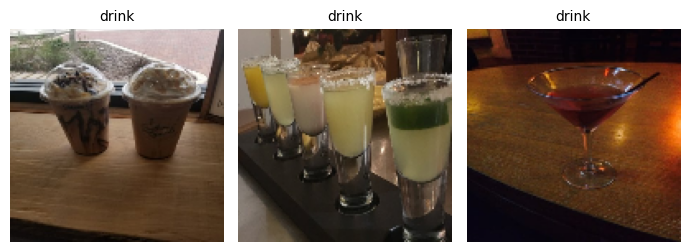

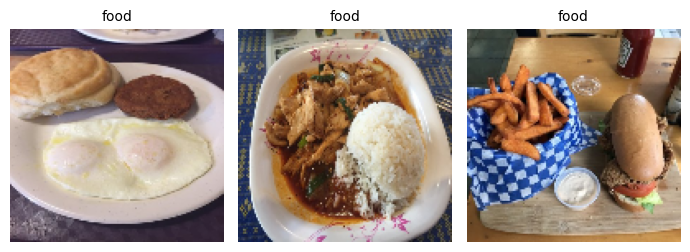

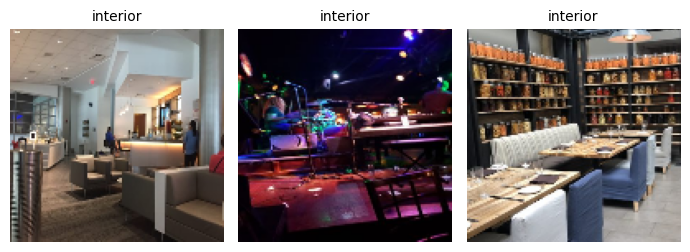

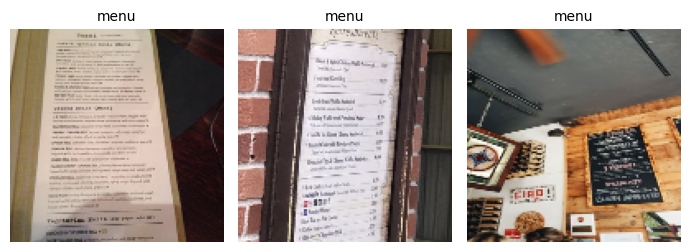

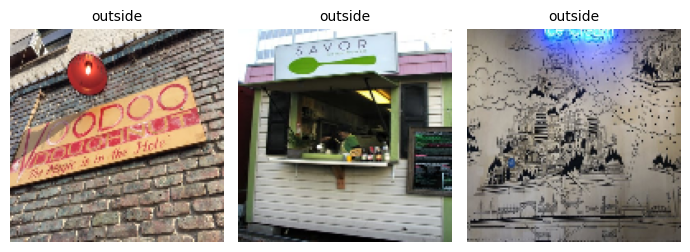

In [80]:
# Fonction qui retourne les ids des photos à partir du label
def list_fct(df, name):
    list_image_name = list(df["photo_id"][df["label"] == name])
    return list_image_name

# Liste des labels
list_labels = list(photos_sample["label"].value_counts().index)

# Dimensions uniformes des images (par exemple, 150x150)
uniform_size = (130, 130)

# Affichage des photos
for label in list_labels:
    fig, axes = plt.subplots(1, 3, figsize=(7, 7))
    
    for i in range(3):
        img_path = f"yelp_photos/photos/{list_fct(photos_sample, label)[i]}.jpg"
        img = imread(img_path)
        
        # Redimensionner l'image pour qu'elle ait des dimensions uniformes
        img_resized = cv2.resize(img, uniform_size)
        
        axes[i].imshow(img_resized)
        axes[i].set_title(label, size=10)
        axes[i].axis('off')  # Masquer les axes pour un affichage plus propre
    
    plt.tight_layout()
    plt.show()


<a name="C4"><h2><big><span style = "color : blue">II - Faisabilité de classification automatique d’images via SIFT</span></big></h2></a>
<h3><big><span style = "color : darkgreen">1 - Définition de la méthode SIFT</span></big></h3>
<h3><big><span style = "color : darkgreen">2 - Prétraitement des images</span></big></h3>

<h3><span style = "color : darkgreen">2 - Prétraitement des données</span></h3>

Nous allons créer une fonction qui fera le <span style = "color : blue">prétraitement de nos images</span>. Nous convertirons d'abord l'image en <span style = "color : blue">**niveau de gris**</span>, nous corrigerons ensuite le <span style = "color : blue">contraste</span> par égalisation d'histogramme, puis <span style = "color : blue">l'exposition</span> par étirement d'histogramme et enfin <span style = "color : blue">le bruit</span> avec l'application d'un lissage par moyennage.

In [81]:
# Fonction de préprocessing d'image
def preprocessing_image(image):
    
    # Charge la photo
    image = Image.open(f"yelp_photos/photos/{image}.jpg")
    
    # Changer l'image en niveau de gris
    image = image.convert("L")
    
    # Correction du contraste
    image = ImageOps.autocontrast(image)
    
    # Correction de l'exposition
    image = ImageOps.equalize(image)
    
    # Correction du bruit avec lissage par moyennage (fenêtre de taille 9)
    image = image.filter(ImageFilter.BoxBlur(1))
    
    return np.array(image)

<h3><big><span style = "color : darkgreen">3 - Application de la méthode SIFT</span></big></h3>

<h3><big><span style = "color : darkorange">Création des descripteurs des images</span></big></h3>

<h3><span style = "color : darkgreen">3 - Création des descripteurs des images</span></h3>

Nous allons créer une <span style = "color : blue">liste de descripteurs par image</span> (`"sift_keypoints_by_img"`) puis nous avons créées une <span style = "color : blue">liste de descripteurs pour l'ensemble des images</span> (`"sift_keypoints_all"`) qui sera utilisée pour créer <span style = "color : blue">les clusters de descripteurs</span>.

In [82]:
sift_keypoints = []
sift = cv2.SIFT_create(500) #limite à 500

for image_num in range(len(photos_sample["photo_id"])):
    
    image = photos_sample["photo_id"][image_num]
    #print(image)
    image = preprocessing_image(image)
    
    keypoints, descripteurs = sift.detectAndCompute(image, None)
    sift_keypoints.append(descripteurs)
    
sift_keypoints_by_img = np.asarray(sift_keypoints, dtype = "object")
sift_keypoints_all = np.concatenate(sift_keypoints_by_img, axis = 0)

print("Nombre de descripteurs : ", sift_keypoints_all.shape)

Nombre de descripteurs :  (96174, 128)


Le résultat affiche **Nombre de descripteurs: (97139, 128)** indique que nous avons extrait un total de **97 139 descripteurs SIFT**, et **chaque descripteur a une dimension de 128**. Autrement dit:

- **97139**: Représente le nombre total de descripteurs SIFT extraits à partir de toutes les images traitées. En d’autres termes, il y a 97139 descripteurs SIFT au total dans l’ensemble des images,
- **128**: Cela indique la dimension de chaque descripteur SIFT. Les descripteurs SIFT sont généralement des **vecteurs de 128 dimensions qui capturent les caractéristiques importantes d’une région spécifique de l’image**. Chaque élément de ce vecteur représente une caractéristique spécifique de la région, ce qui permet de comparer et de faire correspondre ces caractéristiques entre différentes images pour des tâches telles que la correspondance d’objets ou la reconnaissance d’objets.

Nous avons ainsi extrait des descripteurs SIFT à partir d’une liste d’images, stockés ces descripteurs dans des tableaux NumPy et affichés le nombre total de descripteurs extraits.</br>

<h3><big><span style = "color : darkorange">Création des clusters de descripteurs</span></big></h3>

<big>Nous allons créer <span style = "color : #7F00FF">**des clusters de descripteurs**</span>. nous utiliserons le `MiniBatchKMeans` pour obtenir un temps de traitement raisonnable.</big>

<h4><span style = "color : red">b. Création des clusters de descripteurs</span></h4>

Nous allons effectuer le <span style = "color : blue"> clustering des descripteurs SIFT</span> stockés dans `sift_keypoints_all`, nous utiliserons l’algorithme de clustering `MiniBatchKMeans` pour obtenir un temps de traitement raisonnable.

In [83]:
!pip install --upgrade scikit-learn
!pip install --upgrade threadpoolctl

In [84]:
k = int(round(np.sqrt(len(sift_keypoints_all)), 0))
print("Nombre de clusters estimés : ", k)

# Clustering par MiniBatchKMeans en spécifiant n_init
kmeans = MiniBatchKMeans(n_clusters=k, init_size=3*k, n_init=3, random_state=0)
kmeans.fit(sift_keypoints_all)


Nombre de clusters estimés :  310


MiniBatchKMeans(init_size=930, n_clusters=310, n_init=3, random_state=0)

Nous avons effectué un clustering sur la liste des descripteurs SIFT en utilisant l’algorithme `MiniBatchKMeans` avec les paramètres spécifiés.
Le résultat nous donne une **estimation de 312 clusters**.

<h3><big><span style = "color : darkorange">Création des features des images</span></big></h3>

<big>Nous allons créer <span style = "color : #7F00FF">**les features des images**</span>. Ce sont <span style = "color : #7F00FF">**les histogrammes des images**</span> (pour une image on compte le nombre de descripteurs associés à chaque cluster).</big>

- <big>Nous allons d'abord prédire à quel <span style = "color : #7F00FF">**cluster appartient chaque descripteur**</span>.</big>
- <big>Nous créons ensuite un histogramme pour chaque image qui <span style = "color : #7F00FF">**compte le nombre de descripteurs de l'image pour chaque cluster**</span>, pondéré par le <span style = "color : #7F00FF">**nombre de descripteurs total**</span> de l'image.</big>

<h4><span style = "color : red">c. Création des features des images</span></h4>

Nous allons créer les <span style = "color : #7F00FF">features des images</span> qui sont les histogrammes des images (= au comptage pour une image du nombre de descripteurs par cluster).

- Nous allons d'abord prédire les <span style = "color : #7F00FF">numéros de cluster associés à chaque descripteur</span>.
- Ensuite nous procéderons à la création d'un histogramme par image qui <span style = "color : #7F00FF">compte pour chaque cluster le nombre de descripteurs de l'image</span>, pondéré par le nombre de descripteurs total de l'image.

In [85]:
def build_histogram(kmeans, descripteurs, image_num):
    
    resultats = kmeans.predict(descripteurs)
    hist = np.zeros(len(kmeans.cluster_centers_))
    nb_descripteurs = len(descripteurs)
    if nb_descripteurs == 0 : 
        print("problème histogramme, image : ", image_num)
    for i in resultats:
        hist[i] += 1.0 / nb_descripteurs
    return hist

# Creation de la matrice des histogrammes
hist_vectors = []

for i, image_descripteurs in enumerate(sift_keypoints_by_img) :
    hist = build_histogram(kmeans, image_descripteurs, i) #calcule les histogrammes
    hist_vectors.append(hist) #vecteur des features

features_sift = np.asarray(hist_vectors)

In [86]:
print(features_sift.shape)

(200, 310)


Nous avons calculé **les histogrammes de caractéristiques** pour un ensemble d'images en utilisant le `clustering MiniBatchKMeans` et les `descripteurs SIFT` extraits précédemment. Ces histogrammes vont être utilisés comme représentation des images pour des tâches ultérieures, telles que la recherche d'images similaires ou la classification d'images.

<h3><big><span style = "color : darkgreen">4 - Réduction de dimension</span></big></h3>

<big>Maintenant que nous avons <span style = "color : #7F00FF">**crée les features**</span> nous allons effectuer une <span style = "color : #7F00FF">**réduction de dimension par ACP**</span>, puis une <span style = "color : #7F00FF">**réduction de dimension par T-SNE**</span></big>

<h3><big><span style = "color : darkorange">Réduction de dimension ACP</span></big></h3>

<big>Nous allons effectuer une <span style = "color : #7F00FF">**réduction de dimension par ACP**</span> qui permet de créer des features décorrelées entre elles, et de diminuer leur dimension. Nous garderons un <span style = "color : #7F00FF">**niveau de variance expliquée élevé**</span> ( $99\%$ ).</big>

<h3><span style = "color : darkgreen">3 - Réduction de dimension</span></h3>

<h4><span style = "color : red">a. Réduction de dimension PCA</span></h4>

Nous allons effectuer une <span style = "color : #7F00FF">**réduction de dimension par ACP**</span> qui permet de créer des features décorrelées entre elles, et de diminuer leur dimension. Nous garderons un <span style = "color : #7F00FF">**niveau de variance expliquée élevé**</span> ( $99\%$ ).

In [87]:
pca = PCA(n_components = 0.99) # Réduction à 99% de variance expliquée
feat_pca = pca.fit_transform(features_sift)

print(f"Dimensions du dataset avant réduction PCA : {features_sift.shape}")
print(f"Dimensions du dataset après réduction PCA : {feat_pca.shape}")

Dimensions du dataset avant réduction PCA : (200, 310)
Dimensions du dataset après réduction PCA : (200, 155)


Nous avons utilisé l'<span style = "color : blue">analyse en composantes principales (PCA) pour réduire la dimensionnalité</span> du jeu de données `features_sift`, **en conservant 99 % de la variance totale**. 
Nous avons affiché les dimensions du jeu de données avant et après la réduction PCA pour montrer comment la dimensionnalité a été réduite. Cette réduction de dimensionnalité va être utile pour simplifier les données tout en préservant les informations les plus importantes, ce qui peut être bénéfique pour des tâches telles que la classification ou la visualisation de données.
L'objectif de cette réduction de dimension est d'avoir pour le T-SNE une <span style = "color : blue">meilleure séparation des données</span> et une <span style = "color : blue">réduction du temps de traitement</span>.

<big>L'impact de cette réduction de dimension pour le <span style = "color : #7F00FF">**T-SNE**</span> est :
- <big>une <span style = "color : #7F00FF">**meilleure séparation des données**</span></big>
- <big>une <span style = "color : #7F00FF">**réduction du temps de traitement**</span></big>
<h3><big><span style = "color : darkorange">Réduction de dimension T-SNE</span></big></h3>

<big>Nous allons effectuer une réduction de dimension en <span style = "color : #7F00FF">**2 composantes T-SNE**</span> qui permet un affichage en $2$D des images.</big>

<h4><span style = "color : red">b. Réduction de dimension avce l'algorithme T-SNE (t-Distributed Stochastic Neighbor Embedding) </span></h4>

Nous utiliserons **l'algorithme t-SNE** pour réduire la dimensionnalité des données `feat_pca` dans un espace bidimensionnel, puis crée un DataFrame Pandas (`df_tsne`) pour stocker les embeddings t-SNE ainsi que les étiquettes de classe associées. Cela va être utile **pour visualiser les données dans un espace bidimensionnel** tout en maintenant les informations sur les classes d'origine.

In [88]:
# Réduction T-SNE en 2 composantes
tsne = TSNE(n_components=2, perplexity=30, n_iter=2000, init="random", learning_rate="auto", random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

# Création du DataFrame avec les composantes
df_tsne = pd.DataFrame(X_tsne[:, 0:2], columns=["tsne1", "tsne2"])
# Correspondance des labels 
df_tsne["class"] = photos_sample["label_num"]
print(df_tsne.shape)

C:\Users\kfaiz\anaconda3\envs\Projet_11_DevelopConceptProuve\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


(200, 3)


Le résultat affiche <span style = "color : blue">(200, 3)" correspond aux dimensions</span> du DataFrame `df_tsne` créée à la suite de l'exécution du code ci-dessus:

- **200**: Correspond au nombre de lignes (ou échantillons) dans le DataFrame: Chaque ligne représente un échantillon ou une observation, généralement associé à une image ou une donnée spécifique.

- **Le 3**: Correspond au nombre de colonnes (ou caractéristiques) dans le DataFrame: Les trois colonnes sont nommées `tsne1`, `tsne2` et `class` voici ce qu'elles représentent:

- **`tsne1` et `tsne2`**: Ce sont les coordonnées des données réduites dans l'espace bidimensionnel <span style = "color : blue">après l'application de l'algorithme t-SNE</span>. Chaque ligne contient les coordonnées de l'échantillon correspondant dans cet espace.

- **`class`** : Il s'agit des <span style = "color : blue">étiquettes de classe associées à chaque échantillon</span>, généralement des numéros ou des catégories qui indiquent à quelle classe chaque échantillon appartient.

En résumé, (200, 3) signifie qu'il y a 200 échantillons dans le DataFrame, avec trois colonnes qui contiennent les coordonnées de l'espace bidimensionnel (tsne1 et tsne2) ainsi que les étiquettes de classe (class) pour chaque échantillon.

- <span style = "color : #7F00FF">Analyse visuelle du T-SNE</span> selon les vraies catégories d'images : nous affichons les images selon les catégories.

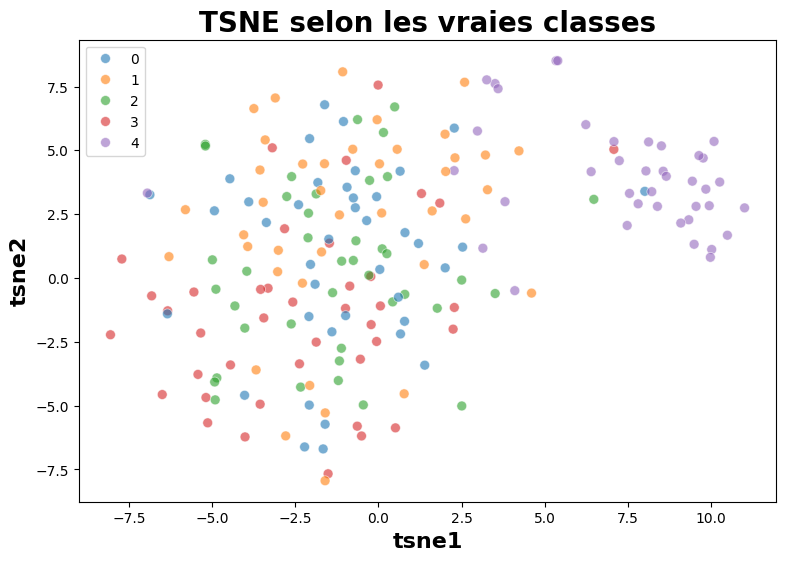

In [89]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = "tsne1", y = "tsne2", hue = "class", data = df_tsne, legend = "brief", 
                palette = sns.color_palette("tab10", n_colors = 5), s = 50, alpha = 0.6)

plt.title("TSNE selon les vraies classes", fontsize = 20, fontweight = "bold")
plt.xlabel("tsne1", fontsize = 16, fontweight = "bold")
plt.ylabel("tsne2", fontsize = 16, fontweight = "bold")
plt.legend(prop = {"size": 10}) 
plt.show()

Il s'agit d'un graphique de dispersion bidimensionnel (scatter plot) qui représente les échantillons dans l'espace t-SNE. Chaque point est coloré en fonction de sa classe d'origine, ce qui nous permet de **visualiser comment les échantillons sont regroupés ou dispersés dans l'espace t-SNE**

- <span style = "color : #7F00FF">**Création des clusters via Kmeans**</span>

<h3><big><span style = "color : darkorange">Création des clusters via Kmeans</span></big></h3>

<big>Nous allons <span style = "color : #7F00FF">**créer les clusters via Kmeans**</span>.</big>

Nous allons effectuer une opération de `clustering K-Means` sur les données réduites `t-SNE` dans le DataFrame `df_tsne` **en créant 5 clusters distincts**. Les étiquettes de cluster sont ensuite ajoutées au DataFrame pour indiquer à quel cluster chaque échantillon appartient.

In [90]:
# Clustering par Kmeans
cls = KMeans(n_clusters=5, random_state=0)
cls.fit(X_tsne)

# Ajout des prédictions des clusters
df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(200, 4)


Nous avons utilisé l'algorithme K-Means pour **regrouper les données réduites dans l'espace bidimensionnel (`X_tsne`) en 5 clusters distincts** et avons ajouté ces informations de cluster au DataFrame `df_tsne

- <span style = "color : #7F00FF">**Analyse visuelle du T-SNE**</span> selon les clusters attribués aux images : nous affichons les images selon les clusters.

Nous allons afficher le graphique de dispersion en utilisant les coordonnées `t-SNE ("tsne1" et "tsne2")` des échantillons du DataFrame `df_tsne`, **mais cette fois-ci**, les points sont colorés <span style = "color : blue"> en fonction de leurs cluster attribué par **l'algorithme K-Means**</span>.

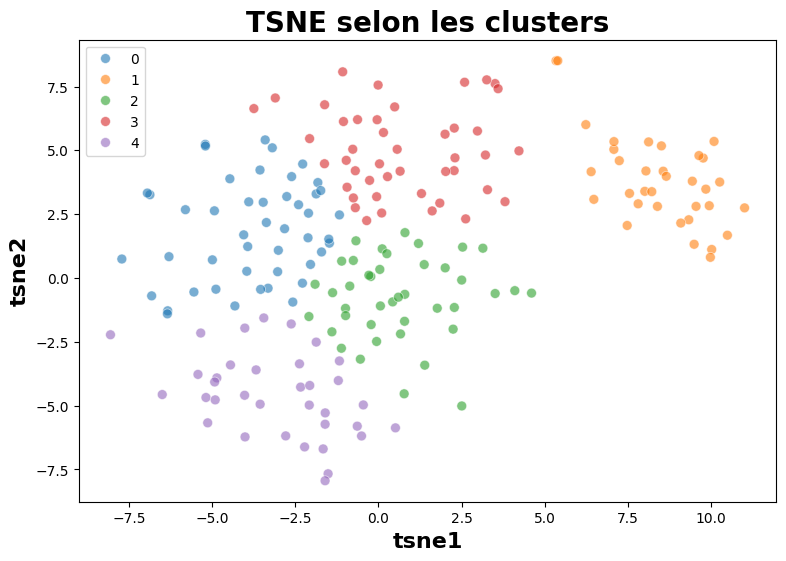

In [91]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = "tsne1", y = "tsne2", hue = "cluster", data = df_tsne, legend = "brief",
                palette = sns.color_palette("tab10", n_colors = 5), s = 50, alpha = 0.6)

plt.title("TSNE selon les clusters", fontsize = 20, fontweight = "bold")
plt.xlabel("tsne1", fontsize = 16, fontweight = "bold")
plt.ylabel("tsne2", fontsize = 16, fontweight = "bold")
plt.legend(prop = {"size": 10})
plt.show()

labels = photos_sample["label_num"]

<h3><big><span style = "color : darkorange">Analyse visuelle du T-SNE</span></big></h3>

<big>Nous allons effectuer une <span style = "color : #7F00FF">**Analyse visuelle du T-SNE**</span>. Nous aurons : 

- <big><span style = "color : #7F00FF">**T-SNE selon les vraies catégories d'images**</span> : nous affichons les images associées à leur catégorie.</big>
- <big><span style = "color : #7F00FF">**T-SNE selon les clusters attribués aux images**</span> : nous affichons les images associées à leur catégorie prédite.</big>

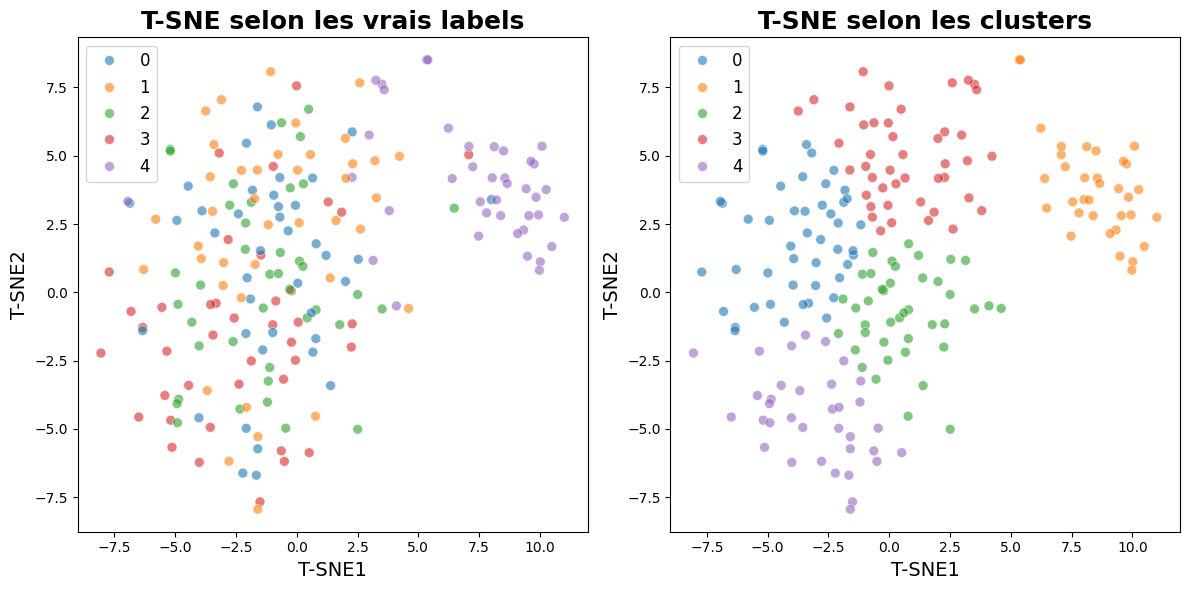

In [92]:
# Créer une figure avec deux sous-graphiques empilés verticalement
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

# Premier Scatter plot
sns.scatterplot(data = df_tsne, x = "tsne1", y = "tsne2", hue = "class", legend = "brief", 
                palette = sns.color_palette("tab10", n_colors = 5), s = 50, alpha = 0.6, ax = axes[0])

axes[0].set_title("T-SNE selon les vrais labels", fontsize = 18, fontweight = "bold") # Titre
axes[0].set_xlabel("T-SNE1", fontsize = 14) # Nom de l'axe x
axes[0].set_ylabel("T-SNE2", fontsize = 14) # Nom de l'axe y
axes[0].legend(prop = {"size": 12}) # Légende

# Deuxième Scatter plot
sns.scatterplot(data = df_tsne, x = "tsne1", y = "tsne2", hue = "cluster", legend = "brief",
                palette = sns.color_palette("tab10", n_colors = 5), s = 50, alpha = 0.6, ax = axes[1])

axes[1].set_title("T-SNE selon les clusters", fontsize = 18, fontweight = "bold") # Titre
axes[1].set_xlabel("T-SNE1", fontsize = 14) # Nom de l'axe x
axes[1].set_ylabel("T-SNE2", fontsize = 14) # Nom de l'axe y
axes[1].legend(prop = {"size": 12}) # Légende

# Ajuste les espacements entre les sous-graphiques
plt.tight_layout()

# Affiche les graphiques
plt.show()

<h3><big><span style = "color : darkgreen">5 - Analyse de similarité</span></big></h3>

<big>Nous allons étudier la <span style = "color : #7F00FF">**similarité**</span> entre les <span style = "color : #7F00FF">**vraies valeurs**</span> et les <span style = "color : #7F00FF">**valeurs prédites par les clusters**</span>.</big>

<h3><big><span style = "color : darkorange">Analyse par cluster</span></big></h3>

<big>Regardons le <span style = "color : #7F00FF">**nombre de photos associés à chaque cluster**</span>.</big>

In [93]:
pd.DataFrame(df_tsne.groupby("cluster").count()["class"]).rename(columns = {"class" : "nombre_photos"}).T

cluster         0   1   2   3   4
nombre_photos  46  34  41  44  35

- <span style = "color : #7F00FF">**Analyse par classe**</span>

 Nous allons examiner la répartition des échantillons dans les différents clusters créés par K-Means autrement dit le nombre de photos par cluster.

In [94]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    46
1    34
2    41
3    44
4    35
Name: class, dtype: int64

Nous constatons que **le nombre de photos par clusters n'est pas très homogène**.

<big>Le nombre de photos par clusters n'est <span style = "color : #7F00FF">**pas très homogène**</span>.</big>

<h3><big><span style = "color : darkorange">Adjusted Rand Index (ARI)</span></big></h3>

<big>Nous allons utiliser L'ARI (Adjusted Rand Index) comme <span style = "color : #7F00FF">**mesure de similarité**</span>. Il est utilisé pour <span style = "color : #7F00FF">**évaluer la qualité d'un groupement des données**</span> en <span style = "color : #7F00FF">**clusters**</span> ou en <span style = "color : #7F00FF">**valeurs prédites**</span> par un algorithme par rapport aux vraies valeurs.</big>

<big>L'ARI prends en compte la possibilité de <span style = "color : #7F00FF">**concordance aléatoire**</span>, ce qui en fait une mesure robuste même lorsque les partitions sont de taille différente. L'ARI varie entre $-1$ et $1$:</big>    

- <big>$-1$ : signifie une <span style = "color : #7F00FF">**dissimilarité totale**</span> (les partitions sont différentes)</big>
- <big>$1$ : signifie une <span style = "color : #7F00FF">**similarité totale**</span> (les partitions sont identiques)</big>
- <big>$0$ : signifie que <span style = "color : #7F00FF">**les partitions sont aléatoires**</span> (pas de corrélation significative)</big>

In [95]:
#labels = photos_sample["label_num"]
print("ARI : ", adjusted_rand_score(labels, cls.labels_))

ARI :  0.17428043895236023


- <span style = "color : #7F00FF">**Analyse de la similarité entre les catégories et les clusters**</span>

Nous allons calculer et afficher l'indice ARI (Adjusted Rand Index) **pour évaluer la similarité** entre les étiquettes de **classe d'origine (`labels`)** et les **étiquettes de cluster attribuées par l'algorithme K-Means (`cls.labels_`)**.

In [96]:
print("ARI : ", adjusted_rand_score(labels, cls.labels_))

ARI :  0.17428043895236023


Nous avons calculés l'ARI pour étudier la similarité, le **score de $0.116$ est très faible**.</br>

En effet, un ARI de 0.1163 **pourrait signifier que les clusters créés par K-Means ne sont pas en très bon accord avec les véritables classes dans les données**, du moins selon cette mesure spécifique. </br>

Dans l'analyse de clustering, **il est généralement souhaitable d'obtenir un ARI plus élevé, proche de 1.0**, ce qui indiquerait une correspondance presque parfaite entre les clusters et les classes d'origine. Cependant, le choix de l'algorithme de clustering, des paramètres et des données peut influencer les performances de l'ARI. Il peut être utile d'explorer d'autres méthodes de clustering ou d'ajuster les paramètres pour obtenir de meilleurs résultats si cela est approprié pour votre application.

<big>Le score de l'ARI <span style = "color : #7F00FF">**est faible**</span>.</big>

<h3><big><span style = "color : darkorange">Matrice de confusion</span></big></h3>

<big>Nous allons créer une fonction qui <span style = "color : #7F00FF">**associe automatiquement à chaque cluster un label**</span> grâce à la fonction `argmax`. Dans le cas où l'association avec cette fonction n'est pas possible, nous choisirons <span style = "color : #7F00FF">**aléatoirement**</span>.</big>

In [97]:
# Fonction qui permet d'associer à chaque cluster un label

'''
Associe à chaque cluster une label

    Arguments:
        y_true - pd.Series : Vraies valeurs des labels
        y_pred - np.ndarray : Valeurs prédites des labels

    Retours:
        pd.Series : Clusters associés aux labels
'''
def conf_mat_transform(y_true,y_pred) :
    
    conf_mat = confusion_matrix(y_true,y_pred)
    
    if sorted(np.argmax(conf_mat, axis = 0)) == [0, 1, 2, 3, 4]:
        corresp = np.argmax(conf_mat, axis=0)
    else:
        print("écrire manuellement les 5 positions :")
        corresp = [int(input()) for i in range(0, 5)]
        if sorted(corresp) != [0, 1, 2, 3, 4]:
            raise Exception("Positions invalides")
    
    print (f"Correspondance des clusters : {corresp} \n")

    labels = pd.Series(y_true, name = "y_true").to_frame()
    labels["y_pred"] = y_pred
    labels["y_pred_transform"] = labels["y_pred"].apply(lambda x : corresp[x]) 
    
    return labels["y_pred_transform"]

<big>Nous allons créer une <span style = "color : #7F00FF">**matrice de confusion**</span> afin d'étudier la similarité des prédictions avec les vrais valeurs.</big>

In [98]:
#Première DataFrame
conf_mat = confusion_matrix(labels, cls.labels_) # Création matrice de confusion 
df_conf_mat = pd.DataFrame(conf_mat, index = [label for label in label2id]) # Création DataFrame

# Deuxième DataFrame
cls_labels_transform = conf_mat_transform(labels, cls.labels_) # Transformation des labels
conf_mat = confusion_matrix(labels, cls_labels_transform) # Création matrice de confusion 
df_conf_mat_trans = pd.DataFrame(conf_mat, index = [label for label in label2id], columns = [i for i in id2label]) # Création DataFrame

écrire manuellement les 5 positions :


 1
 0
 2
 3
 4


Correspondance des clusters : [1, 0, 2, 3, 4] 



<big>Nous allons afficher ces <span style = "color : #7F00FF">**matrices de confusions**</span> sous forme <span style = "color : #7F00FF">**d'heatmap**</span> afin d'avoir un meilleur visuel.</big>

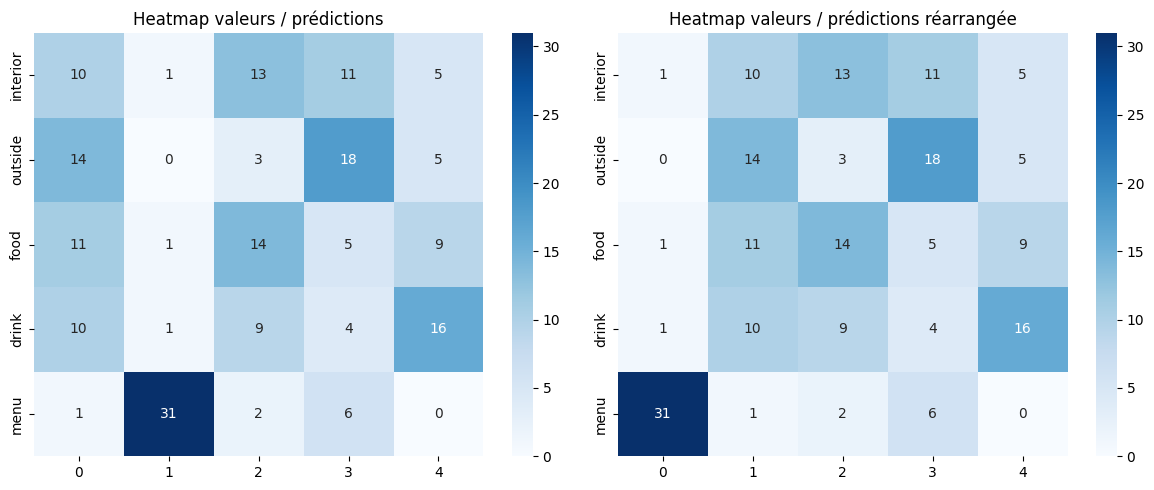

In [102]:
# Créer une figure avec une grille de sous-graphiques 1x2 (1 ligne, 2 colonnes)
fig, axes = plt.subplots(1, 2, figsize = (12, 5))  # 1 ligne, 2 colonnes

# Première heatmap

sns.heatmap(df_conf_mat, annot = True, cmap = "Blues", ax = axes[0])
axes[0].set_title('Heatmap valeurs / prédictions') # Titre

# Deuxième heatmap
sns.heatmap(df_conf_mat_trans, annot = True, cmap = "Blues", ax = axes[1])
axes[1].set_title('Heatmap valeurs / prédictions réarrangée') # Titre

# Ajuste les espacements entre les sous-graphiques
plt.tight_layout()

# Affiche les graphiques
plt.show()

<big>Nous avons des <span style = "color : #7F00FF">**données équilibrées**</span>. Ainsi, pour étudier la <span style = "color : #7F00FF">**précision**</span>, nous utiliserons comme <span style = "color : #7F00FF">**métrique l’accuracy**</span> qui calcule le <span style = "color : #7F00FF">**taux de prédictions correctes**</span>. En effet, nous devons <span style = "color : #7F00FF">**limiter le taux de faux positifs / faux négatifs**</span>.</big>  

<big>Observons <span style = "color : #7F00FF">**l'accuracy**</span> :</big>

J'avais utilisé: 1 0 2 3 4 en entrée

In [103]:
print(f"Accuracy : {accuracy_score(labels, cls_labels_transform)}")

Accuracy : 0.165


<big>Nous pouvons associer nos clusters avec nos labels mais ce n'est <span style = "color : #7F00FF">**pas très précis**</span>. Nous allons essayer une autre méthode pour tenter d'améliorer nos résultats.</big>

Nous allons afficher la <span style = "color : blue">matrice de confusion</span> pour laquelle nous allons associer à l'aide de la fonction `argmax` les labels de base avec les clusters que nous avons créés.</br>
La matrice de confusion est une table qui montre combien d'échantillons appartiennent à chaque classe réelle et à chaque cluster prédit.

Si nous ne pouvons pas les classer de cette manière, nous le ferons manuellement en fonction de ce qui nous parrait être le plus cohérent.

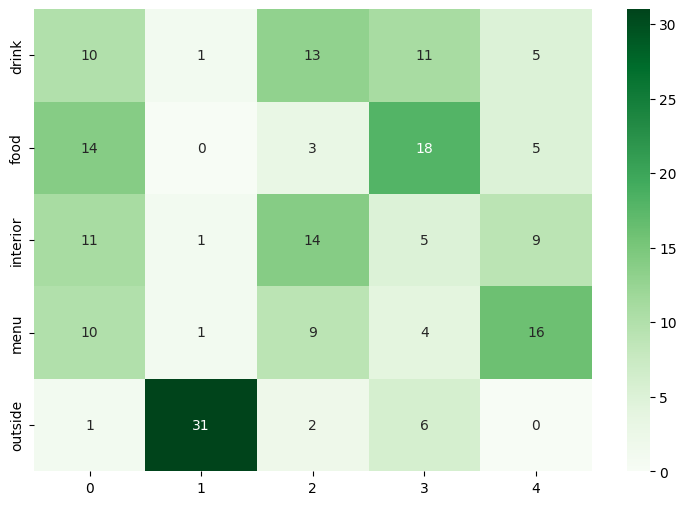

In [104]:
conf_mat = confusion_matrix(labels, cls.labels_)
conf_mat_heatmap = pd.DataFrame(conf_mat, index=[label for label in list_labels])

plt.figure(figsize=(9, 6))
sns.heatmap(conf_mat_heatmap, annot=True, cmap = "Greens")
plt.show()


Nous avons calculé la matrice de confusion **entre les étiquettes de classe d'origine** et les **étiquettes de cluster attribuées par K-Means**, puis avons affiché cette matrice sous forme de heatmap. </br>
La heatmap montre visuellement à quel point les échantillons sont correctement ou incorrectement regroupés dans les différents clusters par rapport à leurs classes d'origine. Cela nous aide à **évaluer la performance du clustering en mettant en évidence les zones où il y a des discordances entre les clusters prédits et les classes réelles**.

La fonction ci-dessous prend deux vecteurs d'étiquettes de classe, calcule une matrice de confusion, et permet à l'utilisateur de spécifier ou de vérifier la correspondance des clusters. 
Elle renvoie ensuite les étiquettes de classe prédites transformées en fonction de cette correspondance. Cette fonction est utile lorsque les étiquettes de cluster ne correspondent pas directement aux classes d'origine et nécessitent une transformation.

Nous allons **évaluer la qualité du regroupement effectué par K-Means après avoir transformé les étiquettes de classe prédites** en utilisant une correspondance de clusters définie. </br>
Nous afficherons la matrice de confusion et l'accuracy pour évaluer à quel point le regroupement correspond aux classes d'origine après la transformation. Cela permet d'obtenir une évaluation plus précise du regroupement en tenant compte de la correspondance entre les clusters et les classes réelles.

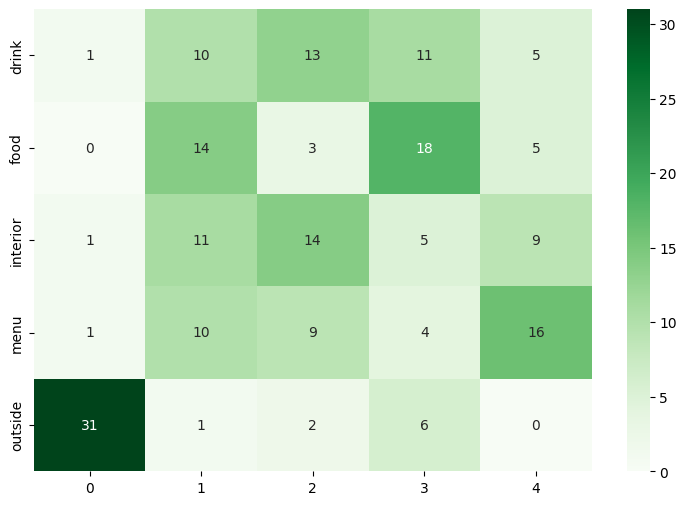

Accuracy : 0.165


In [105]:
# cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = confusion_matrix(labels, cls_labels_transform)

df_conf_mat = pd.DataFrame(conf_mat, index = [label for label in list_labels], columns = [i for i in "01234"])
plt.figure(figsize = (9, 6))
sns.heatmap(df_conf_mat, annot = True, cmap = "Greens")
plt.show()

print("Accuracy :", accuracy_score(labels, cls_labels_transform))

Nous pouvons associer nos clusters avec nos classes mais ce n'est <span style = "color : #7F00FF">pas très précis</span> (accuracy $= 0,41$) Nous allons essayer une autre méthode pour tenter d'améliorer nos résultats.

---
<div class = "alert alert-block alert-info"><big><center><span style = "color : blue"><b> classification par réseaux de neurones convolutifs (CNN) </span></b></center></big></br>

La classification automatique d'images via le transfert d'apprentissage avec des réseaux de neurones convolutionnels (CNN) est une approche courante en apprentissage automatique pour résoudre des problèmes de classification d'images. Cette méthode exploite des modèles CNN pré-entraînés sur de grandes bases de données contenant diverses catégories d'images, comme ImageNet. Voici une explication détaillée de cette approche:

-<span style = "color : green"> Réseaux de neurones convolutionnels (CNN) :</span></br> Les CNN sont une architecture de réseau de neurones spécialement conçue pour la vision par ordinateur et la reconnaissance d'images. Ils sont composés de couches de convolution, de couches de pooling et de couches entièrement connectées. Les couches de convolution sont responsables de l'extraction de caractéristiques à partir de l'image.

-<span style = "color : green"> Transfert d'apprentissage :</span></br> Le transfert d'apprentissage est une technique qui consiste à utiliser un modèle pré-entraîné comme point de départ pour résoudre une tâche similaire mais différente. Dans le contexte de la classification d'images, cela signifie que vous pouvez utiliser un modèle CNN pré-entraîné sur un grand jeu de données (par exemple, ImageNet) comme un extracteur de caractéristiques universel pour vos propres données.

Les étapes du transfert d'apprentissage pour la classification d'images :

a. Choix du modèle pré-entraîné : Vous commencez par choisir un modèle CNN pré-entraîné adapté à votre problème. Les modèles couramment utilisés incluent VGG16, ResNet, Inception, MobileNet, etc. Ces modèles ont déjà appris à extraire des caractéristiques utiles à partir d'images.

b. Suppression des couches supérieures : Vous retirez généralement les couches supérieures du modèle pré-entraîné (les couches de classification) car elles sont spécifiques à la tâche pour laquelle le modèle a été initialement entraîné. Vous gardez les couches de convolution et de pooling pour extraire des caractéristiques.

c. Ajout de nouvelles couches : Vous ajoutez ensuite de nouvelles couches au modèle pour effectuer la classification spécifique à votre problème. Ces couches incluent généralement des couches entièrement connectées pour la classification finale, ainsi qu'une couche de sortie avec le nombre de classes que vous souhaitez prédire.

d. Entraînement : Vous entraînez le modèle en utilisant vos données spécifiques à la tâche. Comme les couches de convolution ont déjà appris des caractéristiques utiles, vous n'avez généralement pas besoin d'un grand nombre d'itérations pour obtenir de bonnes performances.

Fine-tuning (ajustement fin) (optionnel) : Si vous avez suffisamment de données spécifiques à votre tâche, vous pouvez également effectuer un ajustement fin des couches de convolution du modèle pré-entraîné. Cela consiste à ré-entraîner ces couches avec un taux d'apprentissage plus faible pour les adapter davantage à votre problème.

Évaluation et prédiction : Après l'entraînement, vous évaluez les performances du modèle sur un ensemble de validation ou de test. Une fois que le modèle est satisfaisant, vous pouvez l'utiliser pour prédire la classe des nouvelles images.

L'avantage du transfert d'apprentissage avec les CNN est qu'il permet de bénéficier de l'apprentissage préalable sur de grandes quantités de données sans avoir besoin d'un grand ensemble de données d'entraînement pour votre tâche spécifique. Cela rend cette approche très efficace, en particulier lorsque les données d'entraînement sont limitées.





</div>


---

<a name="C5"><h2><big><span style = "color : blue">III - Faisabilité de classification automatique d’images via CNN Transfer Learning</span></big></h2></a>
<big>Nous allons étudier dans cette partie la <span style = "color : #7F00FF">**faisabilité de la classification automatique d’images**</span> via <span style = "color : #7F00FF">**CNN Transfer Learning**</span>. Nous commencerons par <span style = "color : #7F00FF">**définir ce modèle**</span>, nous verrons comment l'utiliser comme <span style = "color : #7F00FF">**modèle d'extraction de features**</span>. Une fois les <span style = "color : #7F00FF">**features extraites**</span>, Nous allons <span style = "color : #7F00FF">**réduire la dimension**</span> des features, puis, faire une <span style = "color : #7F00FF">**étude de similarité**</span>.</big>

<h3><big><span style = "color : darkgreen">1 - Définition du modèle</span></big></h3>

<big>Le <span style = "color : #7F00FF">**modèle VGG16**</span> est une architecture de <span style = "color: #7F00FF">**réseau de neurones convolutifs**</span> (CNN) composée de <span style = "color : #7F00FF">**$16$ couches**</span>, d'où son nom "VGG16" (VGG avec 16 couches). Elle est particulièrement célèbre pour sa <span style = "color: #7F00FF">**simplicité**</span> et son <span style = "color: #7F00FF">**efficacité**</span>, ainsi que pour sa <span style = "color: #7F00FF">**performance exceptionnelle dans la classification d'images**</span>.</big>

<img src = "img_notebook/VGG16_3.png" width = 60% height = 40%>

<h3><big><span style = "color : darkorange">Pré-entrainement du modèle</span></big></h3>

<big>Le modèle VGG16 a été <span style = "color: #7F00FF">**préentraîné**</span> sur le jeu de données <span style = "color: #7F00FF">**ImageNet**</span>, qui contient des millions d'images réparties en $1 000$ classes d'objets différents. Grâce à cette préformation, le modèle VGG16 a <span style = "color: #7F00FF">**appris des caractéristiques génériques**</span> utiles pour la <span style = "color: #7F00FF">**classification d'images**</span>.</big>

<h3><big><span style = "color : darkorange">Input du modèle</span></big></h3>

<big><span style = "color: #7F00FF">**L'Input**</span> ( entrée) du modèle VGG16 est une <span style = "color: #7F00FF">**image sous forme de tableau multidimensionnel**</span> (3D) de forme : $(224, 224, 3)$. Nous avons la <span style = "color: #7F00FF">**taille de l'image**</span> : $224x224$ pixels avec $3$ <span style = "color: #7F00FF">**canaux de couleur**</span> (Rouge, Vert, Bleu, souvent notés RVB).</big>

<big>Avant de fournir l'image en entrée au modèle VGG16, il est courant de lui appliquer un <span style = "color: #7F00FF">**prétraitement**</span>. De plus, les valeurs de pixels de l'image doivent généralement être <span style = "color: #7F00FF">**mises à l'échelle dans une plage spécifique**</span>, en fonction des besoins du modèle.</big>

<h3><big><span style = "color : darkorange">Couches de convolution</span></big></h3>

<big><span style = "color: #7F00FF">**Les couches de convolution**</span> dans le modèle VGG16 sont responsables de <span style = "color: #7F00FF">**l'extraction de caractéristiques**</span> importantes des images. Ces couches jouent un rôle clé dans la capacité du modèle à <span style = "color: #7F00FF">**reconnaître des motifs visuels**</span>, tels que des bords, des textures, des formes et même des objets complexes.</big>
    
<big>Elles utilisent des <span style = "color: #7F00FF">**filtres de convolution**</span> (ou noyaux) de petite taille, généralement $3x3$ pixels, appris par le modèle <span style = "color: #7F00FF">**automatiquement**</span> pendant l'entraînement. Ces filtres se <span style = "color: #7F00FF">**déplacent à travers l'image**</span> d'entrée et pour chaque position, effectue une <span style = "color: #7F00FF">**multiplication**</span> élément par élément entre ses valeurs et les valeurs de la portion de l'image. Le résultat est ensuite <span style = "color: #7F00FF">**sommé**</span> pour produire une seule valeur qui représente la réponse du filtre à cette position.</big>

<big>Une caractéristique importante des couches de convolution est l'utilisation de <span style = "color: #7F00FF">**poids partagés**</span>. Cela signifie que les <span style = "color: #7F00FF">**mêmes filtres**</span> (avec les mêmes poids) sont appliqués à chaque position de l'image.</big>

<h3><big><span style = "color : darkorange">Activation ReLu</span></big></h3>

<big>Après chaque opération de convolution, une <span style = "color: #7F00FF">**fonction d'activation ReLU**</span> (Rectified Linear Unit) est généralement appliquée. La fonction <span style = "color: #7F00FF">**remplace les valeurs négatives par zéro**</span>, ce qui ajoute de la <span style = "color: #7F00FF">**non-linéarité**</span> au modèle et <span style = "color: #7F00FF">**accélère l'apprentissage**</span>.</big>

<h3><big><span style = "color : darkorange">Couches de MaxPooling</span></big></h3>

<big>Dans le modèle, plusieurs couches de convolution sont empilées les unes sur les autres. Ces couches sont suivies de <span style = "color: #7F00FF">**couches de max-pooling**</span> qui réduisent la dimension spatiale des activations en prenant la valeur maximale dans une petite fenêtre de l'image.</big>

<h3><big><span style = "color : darkorange">Couches Flatten</span></big></h3>

<big>Avant d'entrer dans les couches fully connected, les activations extraites par les couches de convolution sont aplaties en un <span style = "color: #7F00FF">**vecteur unidimensionnel**</span>. Cela signifie que toutes les caractéristiques spatiales extraites par les couches de convolution sont alignées en un <span style = "color: #7F00FF">**seul vecteur**</span>.</big>

<h3><big><span style = "color : darkorange">Couches fully connected</span></big></h3>

<big>Dans le modèle, les <span style = "color: #7F00FF">**couches fully connected**</span>  sont responsables de la <span style = "color: #7F00FF">**transformation des caractéristiques**</span> extraites par les couches de convolution en une <span style = "color: #7F00FF">**prédiction de classe**</span>.</big>

<big>Les <span style = "color: #7F00FF">**données aplaties**</span> sont introduites dans les <span style = "color: #7F00FF">**couches fully connected**</span>. Chaque neurone dans ces couches <span style = "color: #7F00FF">**est connecté**</span> à tous les neurones de la couche précédente. Après chaque couche fully connected, une <span style = "color: #7F00FF">**fonction d'activation ReLU**</span> est appliquée.</big>

<h3><big><span style = "color : darkorange">Output du modèle</span></big></h3>

<big>La dernière couche fully connected est <span style = "color: #7F00FF">**l'Output**</span> (la couche de sortie). Le <span style = "color: #7F00FF">**nombre de neurones**</span> dans cette couche correspond au <span style = "color: #7F00FF">**nombre de classes**</span> dans la tâche de classification. Les valeurs de sortie de cette couche sont soumises à une fonction d'activation, comme la fonction <span style = "color: #7F00FF">**softmax**</span>, qui convertit ces valeurs en <span style = "color: #7F00FF">**probabilités**</span> pour chaque classe. La classe avec la probabilité la plus élevée est généralement considérée comme la <span style = "color: #7F00FF">**prédiction finale**</span> du modèle.</big>

<h3><big><span style = "color : darkgreen">2 - Utilisation du modèle vgg16 comme modèle d'extraction de features.</span></big></h3>

<big>Le modèle pré-entraîné VGG16 peut être utilisé comme <span style = "color : #7F00FF">**modèle d'extraction de features**</span> d'images.</big>

<big>Nous allons charger le modèle puis <span style = "color : #7F00FF">**supprimer l'output layer**</span>. Les dernières couches du modèle avant l'output layer sont des couches <span style = "color : #7F00FF">**fully connected**</span> qui fournissent un ensemble complexe de features pour décrire une image. Cela signifie que <span style = "color : #7F00FF">**la nouvelle couche de sortie est la couche fully connected**</span>.</big>
    
<big>Ainsi, pour chaque image, nous allons <span style = "color : #7F00FF">**extraire les features sous la forme de vecteur**</span> de $4~096$ nombres.</big>

<a name="C12"><h2><span style = "color : blue">II - Classification automatique d’images via CNN Transfer Learning</span></h2></a>

<h3><span style = "color : darkgreen">1 - Utilisation du modèle vgg16 comme modèle d'extraction de features.</span></h3>

Le modèle pré-entraîné VGG16 peut être utilisé comme <span style = "color : #7F00FF">modèle d'extraction de features</span> de photos. Pour cela, nous allons charger le modèle puis <span style = "color : #7F00FF">supprimer l'output layer</span>. Les dernières couches du modèle avant l'output layer sont des couches <span style = "color : #7F00FF">fully connected</span> qui fournissent un ensemble complexe de features pour décrire une image. Cela signifie que <span style = "color : #7F00FF">la nouvelle couche de sortie est la couche fully connected</span>.
    
Nous allons donc extraire les features de chaque photo sous la forme de vecteur de $4~096$ nombres pour chaque photo.

In [106]:
features = []

# Charge le model et supprime l'output layer
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

# convertit les images en numpy array
for image_num in range(len(photos_sample["photo_id"])): 
    photo = photos_sample["photo_id"][image_num]
    image = load_img(f"yelp_photos/photos/{photo}.jpg", target_size = (224, 224, 3))
    image = img_to_array(image)

    # reshape pour le modèle
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

    # prepare l'image pour le VGG16
    image = preprocess_input(image)

    # extrait les features
    feature = model.predict(image)
    features.append(feature[0])

im_features = np.asarray(features)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 661ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 448ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 310ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 354ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 341ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 320ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

<h3><big><span style = "color : darkgreen">3 - Réduction de dimension</span></big></h3>

<big>Maintenant que nous avons <span style = "color : #7F00FF">**les features**</span> nous allons effectuer une <span style = "color : #7F00FF">**réduction de dimension par ACP**</span>, puis une <span style = "color : #7F00FF">**réduction de dimension par T-SNE**</span></big>

<h3><big><span style = "color : darkorange">Réduction de dimension ACP</span></big></h3>

<big>Nous allons effectuer une <span style = "color : #7F00FF">**réduction de dimension par ACP**</span> qui permet de créer des features décorrelées entre elles, et de diminuer leur dimension. Nous garderons un <span style = "color : #7F00FF">**niveau de variance expliquée élevé**</span> ( $99\%$ ).</big>

<h3><span style = "color : darkgreen">2 - Réduction de dimension</span></h3>

<h4><span style = "color : red">a. Réduction de dimension PCA</span></h4>

Nous allons éffectuer une <span style = "color : blue">réduction de dimension par ACP</span> qui permet de créer des features décorrélées entre elles, et de diminuer leur dimension. Nous garderons un <span style = "color : blue">niveau de variance expliquée élevé</span> ( $99\%$ ).

<h3><span style = "color : darkgreen">2 - Sampling des données</span></h3>

Nous allons sélectionner un <span style = "color : #7F00FF">**sample de $200$ images**</span> ($40$ par catégorie).

In [107]:
# Réduction à 99% de variance expliquée
pca = PCA(n_components = 0.99)   
feat_pca = pca.fit_transform(im_features)

print("Dimensions dataset avant réduction PCA : ", im_features.shape)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (200, 4096)
Dimensions dataset après réduction PCA :  (200, 185)


<h3><big><span style = "color : darkorange">Réduction de dimension T-SNE</span></big></h3>

<big>Nous allons effectuer une réduction de dimension en <span style = "color : #7F00FF">**2 composantes T-SNE**</span> qui permet un affichage en $2$D des images.</big>

<h4><span style = "color : red">b. Réduction de dimension T-SNE</span></h4>

Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images.

In [108]:
# Réduction T-SNE en 2 composantes
tsne = TSNE(n_components = 2, perplexity = 30, n_iter = 2000, init = "random", learning_rate = "auto", random_state = 6)
X_tsne = tsne.fit_transform(feat_pca)

# Création du DataFrame avec les composantes
df_tsne = pd.DataFrame(X_tsne[:,0:2], columns = ["tsne1", "tsne2"])
# Correspondance des labels 
df_tsne["class"] = photos_sample["label_num"]
print(df_tsne.shape)

C:\Users\kfaiz\anaconda3\envs\Projet_11_DevelopConceptProuve\Lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


(200, 3)


- <span style = "color : blue">Analyse visuelle du T-SNE</span> selon les vraies catégories d'images: Nous afficherons les images selon les catégories.

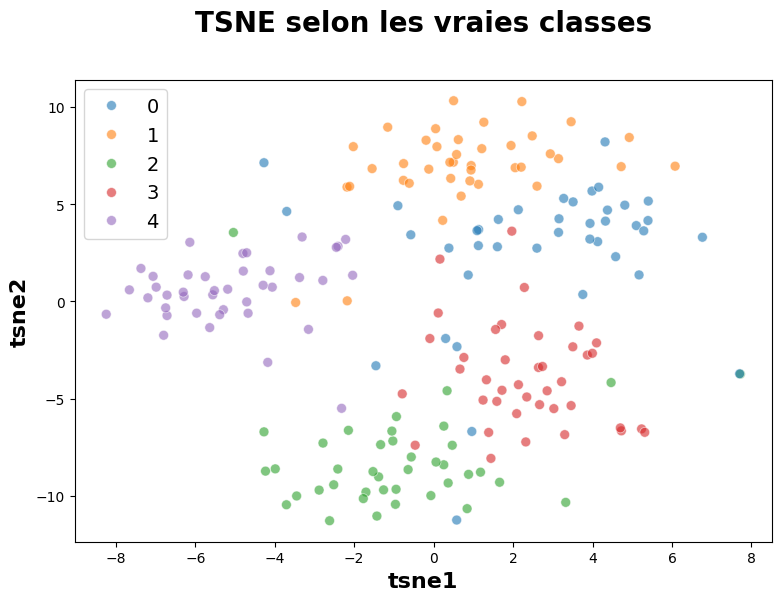

In [109]:
plt.figure(figsize=(9, 6))
sns.scatterplot(x = "tsne1", y = "tsne2", hue = "class", data = df_tsne, legend = "brief",
                palette = sns.color_palette("tab10", n_colors = 5), s = 50, alpha = 0.6)

plt.title("TSNE selon les vraies classes", fontsize = 20, pad = 35, fontweight = "bold")
plt.xlabel("tsne1", fontsize = 16, fontweight = "bold")
plt.ylabel("tsne2", fontsize = 16, fontweight = "bold")
plt.legend(prop = {'size': 14}) 

plt.show()

<h3><big><span style = "color : darkorange">Création des clusters via Kmeans</span></big></h3>

<big>Nous allons <span style = "color : #7F00FF">**créer les clusters via Kmeans**</span>.</big>

- <span style = "color : #7F00FF">**Création des clusters via Kmeans**</span>

In [110]:
# Clustering par Kmeans
cls = KMeans(n_clusters = 5, random_state = 6)
cls.fit(X_tsne)

# Ajout des prédictions des clusters
df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(200, 4)


<h3><big><span style = "color : darkorange">Analyse visuelle du T-SNE</span></big></h3>

<big>Nous allons effectuer une <span style = "color : #7F00FF">**Analyse visuelle du T-SNE**</span>. Nous aurons : 

- <big><span style = "color : #7F00FF">**T-SNE selon les vraies catégories d'images**</span> : nous affichons les images associées à leur catégorie.</big>
- <big><span style = "color : #7F00FF">**T-SNE selon les clusters attribués aux images**</span> : nous affichons les images associées à leur catégorie prédite.</big>

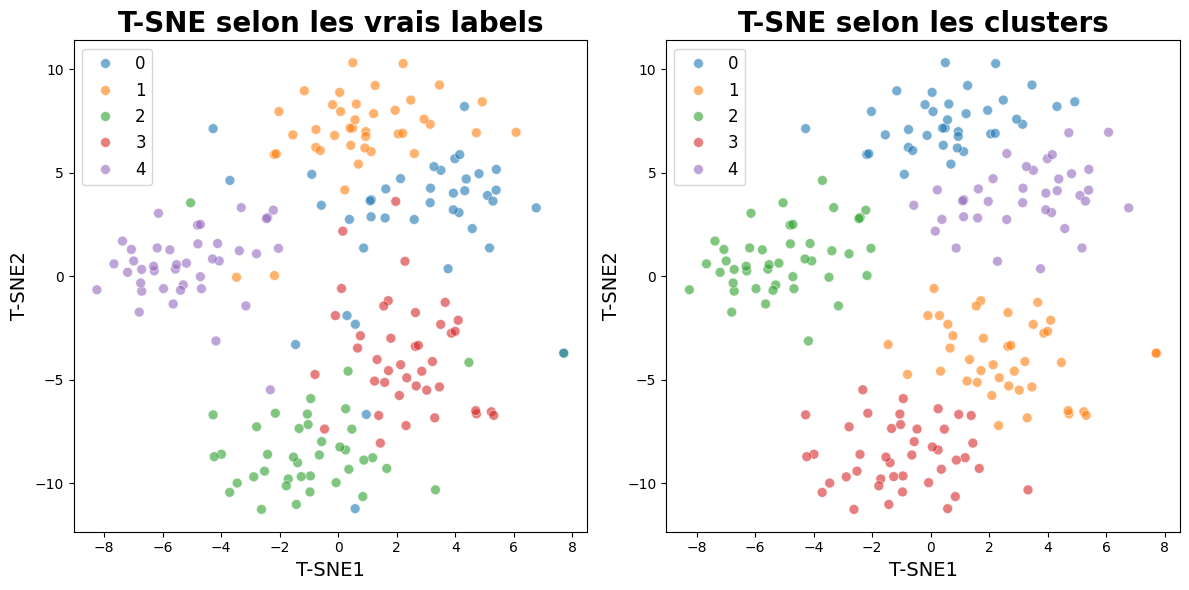

In [111]:
# Créer une figure avec deux sous-graphiques empilés verticalement
fig, axes = plt.subplots(1, 2, figsize = (12, 6))

# Premier Scatter plot
sns.scatterplot(data = df_tsne, x = "tsne1", y = "tsne2", hue = "class", legend = "brief", 
                palette = sns.color_palette("tab10", n_colors = 5), s = 50, alpha = 0.6, ax = axes[0])

axes[0].set_title("T-SNE selon les vrais labels", fontsize = 20, fontweight = "bold") # Titre
axes[0].set_xlabel("T-SNE1", fontsize = 14) # Nom de l'axe x
axes[0].set_ylabel("T-SNE2", fontsize = 14) # Nom de l'axe y
axes[0].legend(prop = {"size": 12}) # Légende

# Deuxième Scatter plot
sns.scatterplot(data = df_tsne, x = "tsne1", y = "tsne2", hue = "cluster", legend = "brief",
                palette = sns.color_palette("tab10", n_colors = 5), s = 50, alpha = 0.6, ax = axes[1])

axes[1].set_title("T-SNE selon les clusters", fontsize = 20, fontweight = "bold") # Titre
axes[1].set_xlabel("T-SNE1", fontsize = 14) # Nom de l'axe x
axes[1].set_ylabel("T-SNE2", fontsize = 14) # Nom de l'axe y
axes[1].legend(prop = {"size": 12}) # Légende

# Ajuste les espacements entre les sous-graphiques
plt.tight_layout()

# Affiche les graphiques
plt.show()

- <span style = "color : blue">Analyse visuelle du T-SNE</span> selon les clusters attribués aux images : nous affichons les images selon les clusters.

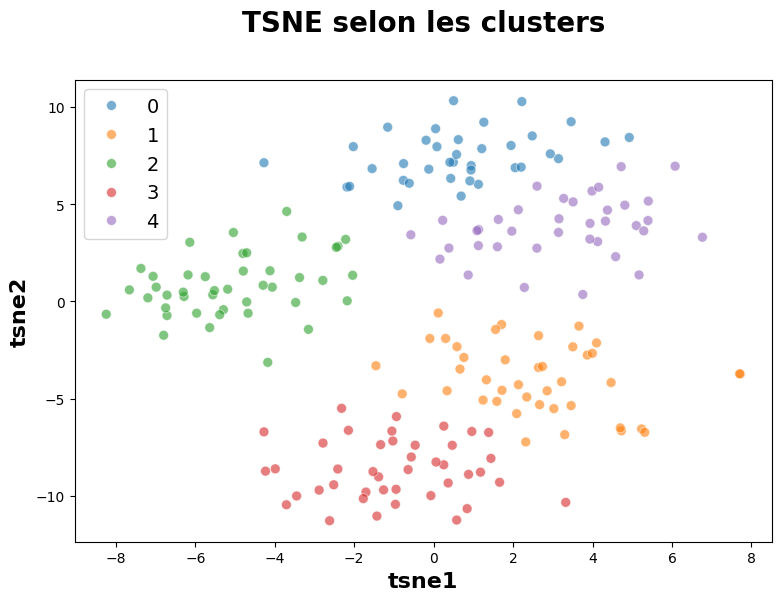

In [112]:
plt.figure(figsize = (9, 6))
sns.scatterplot(x = "tsne1", y = "tsne2", hue = "cluster", data = df_tsne, legend = "brief", 
                palette = sns.color_palette("tab10", n_colors = 5), s = 50, alpha = 0.6)

plt.title("TSNE selon les clusters", fontsize = 20, pad = 35, fontweight = 'bold')
plt.xlabel("tsne1", fontsize = 16, fontweight = "bold")
plt.ylabel("tsne2", fontsize = 16, fontweight = "bold")
plt.legend(prop = {"size" : 14}) 

plt.show()

labels = photos_sample["label_num"]

<h3><big><span style = "color : darkgreen">4 - Analyse de similarité</span></big></h3>

<big>Nous allons étudier la <span style = "color : #7F00FF">**similarité**</span> entre les <span style = "color : #7F00FF">**vraies valeurs**</span> et les <span style = "color : #7F00FF">**valeurs prédites par les clusters**</span>.</big>

<h3><big><span style = "color : darkorange">Analyse par label</span></big></h3>

<big>Regardons le <span style = "color : #7F00FF">**nombre de photos associés à chaque cluster**</span>.</big>

In [113]:
pd.DataFrame(df_tsne.groupby("cluster").count()["class"]).rename(columns = {"class" : "nombre_photos"}).T

cluster         0   1   2   3   4
nombre_photos  37  41  43  42  37

- <span style = "color : #7F00FF">Analyse par classe</span> : regardons le nombre de photos par cluster.

In [114]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    37
1    41
2    43
3    42
4    37
Name: class, dtype: int64

<big>Le nombre de photos par clusters est déjà <span style = "color : #7F00FF">**plus homogène**</span> que pour la méthode SIFT.</big>

<h3><big><span style = "color : darkorange">Adjusted Rand Index (ARI)</span></big></h3>

<big>Nous allons utiliser L'ARI (Adjusted Rand Index) comme <span style = "color : #7F00FF">**mesure de similarité**</span>.</big>

- <span style = "color : #7F00FF">Analyse de la similarité entre les catégories et les clusters</span> : nous calculons l'ARI pour étudier la similarité, nous avons un bon score de $0,64$ pour une étude de faisabilité.

In [115]:
print("ARI : ", adjusted_rand_score(labels, cls.labels_))

ARI :  0.6962308470193674


<big>Le score de l'ARI <span style = "color : #7F00FF">**est bon**</span> pour une <span style = "color : #7F00FF">**étude de faisabilité**</span>.</big>

Le nombre de photos par clusters est assez homogène.

Nous allons afficher la <span style = "color : blue">matrice de confusion</span> pour laquelle nous allons associer à l'aide de la fonction `argmax` les labels de base avec les clusters que nous avons créés. Si nous ne pouvons pas les classer de cette manière, nous le ferons manuellement en fonction de ce qui nous parrait être le plus cohérent.

<h3><big><span style = "color : darkorange">Matrice de confusion</span></big></h3>

<big>Nous allons créer une <span style = "color : #7F00FF">**matrice de confusion**</span> afin d'étudier la similarité des prédictions avec les vraies valeurs.</big>

In [116]:
#Premier DataFrame
conf_mat = confusion_matrix(labels, cls.labels_) # Création matrice de confusion 
df_conf_mat = pd.DataFrame(conf_mat, index = [label for label in label2id]) # Création DataFrame

#Deuxième DataFrame
cls_labels_transform = conf_mat_transform(labels, cls.labels_) # Transformation des labels
conf_mat = confusion_matrix(labels, cls_labels_transform) # Création matrice de confusion 
df_conf_mat_trans = pd.DataFrame(conf_mat, index = [label for label in label2id], columns = [i for i in id2label]) # Création DataFrame

Correspondance des clusters : [1 3 4 2 0] 



<big>Nous allons afficher ces <span style = "color : #7F00FF">**matrices de confusions**</span> sous forme <span style = "color : #7F00FF">**d'heatmaps**</span> afin d'avoir un meilleur visuel.</big>

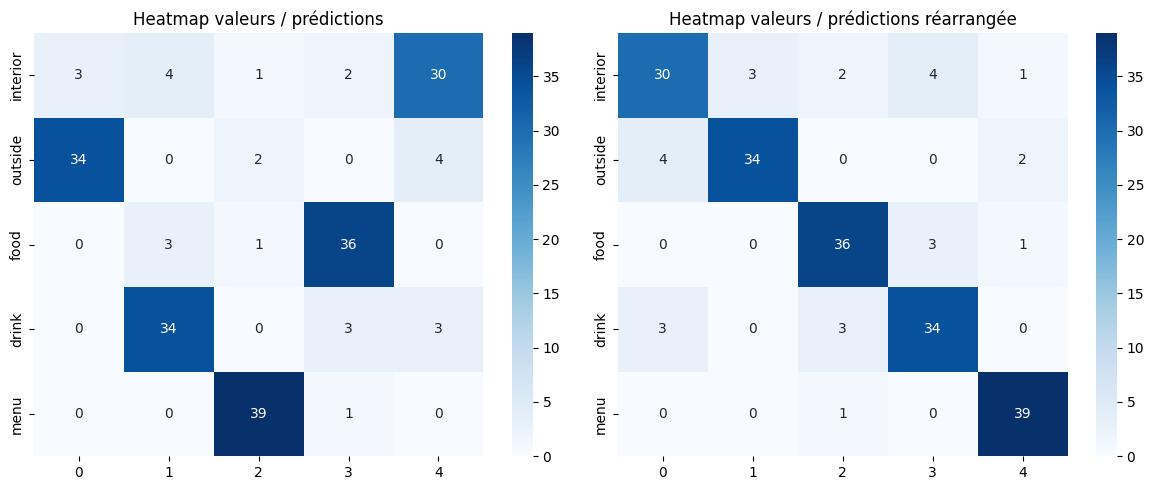

In [117]:
# Créer une figure avec une grille de sous-graphiques 1x2 (1 ligne, 2 colonnes)
fig, axes = plt.subplots(1, 2, figsize = (12, 5))  # 1 ligne, 2 colonnes

# Première heatmap
sns.heatmap(df_conf_mat, annot = True, cmap = "Blues", ax = axes[0])
axes[0].set_title('Heatmap valeurs / prédictions') # Titre

# Deuxième heatmap
sns.heatmap(df_conf_mat_trans, annot = True, cmap = "Blues", ax = axes[1])
axes[1].set_title('Heatmap valeurs / prédictions réarrangée') # Titre

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

<big>Nous allons observer <span style = "color : #7F00FF">**l'accuracy**</span> :</big>

In [118]:
print(f"Accuracy : {accuracy_score(labels, cls_labels_transform)}")

Accuracy : 0.865


<big>Nous pouvons associer nos clusters avec nos labels de manière plus précise de cette façon. Ceci confirme la <span style = "color : #7F00FF">**faisabilité de la classification**</span> de nos images par ces catégories.</big>

<Axes: >

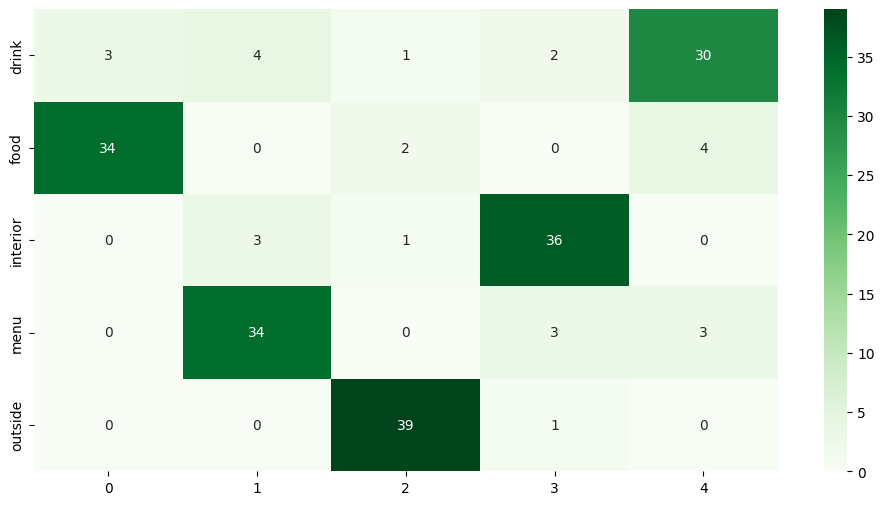

In [119]:
conf_mat = confusion_matrix(labels, cls.labels_)
conf_mat_heatmap = pd.DataFrame(conf_mat, index = [label for label in list_labels])

<Axes: >

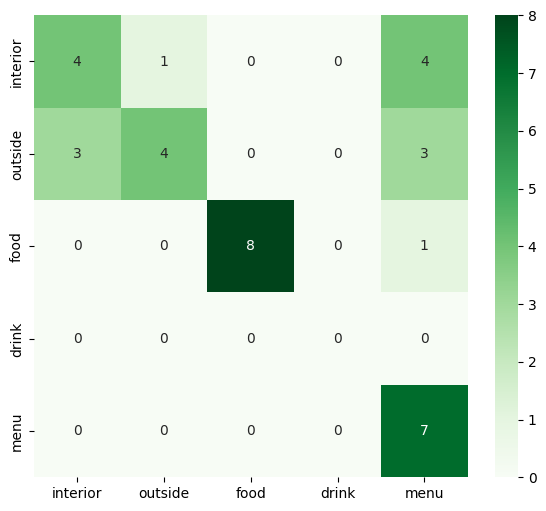

In [169]:
plt.figure(figsize = (7, 6))
sns.heatmap(conf_mat_heatmap, annot = True, cmap = "Greens")

In [168]:
cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = confusion_matrix(labels, cls_labels_transform)

df_conf_mat = pd.DataFrame(conf_mat, index = [label for label in list_labels], columns = [i for i in "01234"])
plt.figure(figsize = (7, 6))
sns.heatmap(df_conf_mat, annot = True, cmap = "Greens")
plt.show()


ValueError: Found input variables with inconsistent numbers of samples: [5, 200]

In [170]:
print("Accuracy :", accuracy_score(labels, cls_labels_transform))

ValueError: Found input variables with inconsistent numbers of samples: [5, 200]

Nous pouvons associer nos clusters avec nos classes de manière plus précise de cette façon (accuracy $= 0,855$) ce qui confirme la <span style = "color : blue">faisabilité de la classification</span> de nos images par ces catégories.

Commençons par résumer notre travail:

- Nous avons commencé par collecter un échantillon de données via l’API Yelp pour s’assurer de la possibilité de collecter des données API en utilisant un Token.

- Ensuite, nous avons analysé les commentaires négatifs pour détecter les différents sujets d’insatisfaction à l'aide d'un LDA.

- Enfin, nous avons analysé les photos pour déterminer les catégories des photos à l'aide de la méthode SIFT puis d'un CNN transfer learning.

Pour conclure, nous avons étudié la faisabilité de détection des sujets d’insatisfaction et de labellisation automatique des photos postées. Ainsi nous avons prouvé la possibilité de réaliser ces tâches. 

Nous pourrions alors pousser notre analyse plus loin en appliquant nos Algorithmes de classification sur l'ensemble des données.

<a name="C6"><h1><big><span style = "color : #BB0B0B">Partie 2 : Modèle de classification des images</span></big></h1></a>

<big>Maintenant que nous avons confirmé la <span style = "color: #7F00FF">**faisabilité de la classification**</span>, nous allons <span style = "color: #7F00FF">**créer un modèle de classification d'images**</span>. Nous allons commencer par <span style = "color: #7F00FF">**étudier les données**</span> que nous allons utiliser. Ce sont des photos issues de `yelp_photos`.</big>

<a name="C7"><h2><big><span style = "color : blue">I - Étude des données</span></big></h2></a>

<big>Nous allons <span style = "color: #7F00FF">**étudier nos données**</span>. Pour cela, nous allons commencer par <span style = "color: #7F00FF">**les récupérer**</span>. Elles sont divisés en $3$ Datasets : </big>

- <big>Le <span style = "color: #7F00FF">**Dataset Train**</span> : qui sera utilisé pour <span style = "color: #7F00FF">**l’entraînement des données**</span>.</big>
    
- <big>Le <span style = "color: #7F00FF">**Dataset Validation**</span> : qui sera utilisé pour <span style = "color: #7F00FF">**mesurer et comparer les scores des modèles**</span> pour les améliorer.</big>
   
- <big>Le <span style = "color: #7F00FF">**Dataset Test**</span> : qui sera utilisé pour réaliser un <span style = "color: #7F00FF">**contrôle final**</span>. Il permet de s’assurer d’un score similaire sur ce <span style = "color: #7F00FF">**set qui n’est à aucun moment intervenu**</span> dans l’élaboration ou le choix du modèle.</big>

<h3><big><span style = "color : darkgreen">1 - Récupération des photos</span></big></h3>

<big>Nous allons <span style = "color: #7F00FF">**récupérer nos données**</span> en créant des DataFrames. Il seront composés des <span style = "color: #7F00FF">**noms des images**</span> ainsi que du <span style = "color: #7F00FF">**label associé**</span>.</big>

## <div class="alert alert-block alert-info"><a name="C2"><center> Partie 2 : Modèle de classification des images </a></center></div>

Maintenant que nous avons confirmé la <span style = "color: blue">faisabilité de la classification</span>, nous allons <span style = "color: blue">créer un modèle de classification d'images</span>. Nous allons commencer par <span style = "color: blue">étudier les données</span> que nous allons utiliser. Ce sont des photos issues de `yelp_photos`.

<a name="C7"><h2><span style = "color : blue">I - Étude des données</span></h2></a>

Nous allons <span style = "color: blue">étudier nos données</span>. Pour cela, nous allons commencer par <span style = "color: blue">les récupérer</span>. Elles sont divisés en $3$ Datasets:

- Le <span style = "color: blue">Dataset Train</span> : qui sera utilisé pour <span style = "color: blue">l’entraînement des données</span>.
    
- Le <span style = "color: blue">Dataset Validation</span> : qui sera utilisé pour <span style = "color: blue">mesurer et comparer les scores des modèles</span> pour les améliorer.
   
- Le <span style = "color: blue">Dataset Test</span> : qui sera utilisé pour réaliser un <span style = "color: blue">contrôle final</span>. Il permet de s’assurer d’un score similaire sur ce <span style = "color: blue">set qui n’est à aucun moment intervenu**</span> dans l’élaboration ou le choix du modèle.

<h3><span style = "color : darkgreen">1 - Récupération des photos</span></h3>

Nous allons <span style = "color: blue">récupérer nos données</span> en créant des DataFrames. Il seront composés des <span style = "color: blue">noms des images</span> ainsi que du <span style = "color: blue">label associé</span>.

In [51]:
#### NONONONONONONONONO

# Dictionnaire de correspondance entre Label et Id
list_labels = {"interior": 0, "outside": 1, "food": 2, "drink": 3, "menu": 4}

# Créer les répertoires pour les photos
base_dir = 'images'
os.makedirs(base_dir, exist_ok=True)

for label in list_labels:
    os.makedirs(os.path.join(base_dir, label), exist_ok=True)

# Copier les photos dans les répertoires correspondants
for index, row in photos_sample.iterrows():
    src = f"yelp_photos/photos/{row['photo_id']}.jpg"
    dst = os.path.join(base_dir, row['label'], f"{row['photo_id']}.jpg")
    shutil.copy(src, dst)

print("Photos copiées avec succès dans les répertoires correspondants.")


Photos copiées avec succès dans les répertoires correspondants.


In [52]:
#### NONONONONONONONONO

# Fonction pour compter le nombre d'images dans chaque sous-répertoire
def count_images_in_directories(base_dir, list_labels):
    counts = {}
    for label in list_labels:
        dir_path = os.path.join(base_dir, label)
        if os.path.exists(dir_path):
            counts[label] = len(os.listdir(dir_path))
        else:
            counts[label] = 0
    return counts

# Compter les images dans chaque sous-répertoire
image_counts = count_images_in_directories(base_dir, list_labels)

# Afficher les résultats
print("\nNombre d'images par sous-catégorie :")
for label, count in image_counts.items():
    print(f"{label}: {count} images")



Nombre d'images par sous-catégorie :
interior: 40 images
outside: 40 images
food: 40 images
drink: 40 images
menu: 40 images


In [121]:
# Créer les répertoires pour les ensembles de données et les catégories
base_dir = 'images'
os.makedirs(base_dir, exist_ok=True)

list_labels = ["food", "drink", "menu", "interior", "outside"]
sets = ['train', 'val', 'test']

for set_name in sets:
    for label in list_labels:
        os.makedirs(os.path.join(base_dir, set_name, label), exist_ok=True)

# Séparer les photos_sample en train, val, et test (60%, 20%, 20%)
np.random.seed(42)  # Pour la reproductibilité
photos_sample = photos_sample.sample(frac=1, random_state=42).reset_index(drop=True)  # Mélanger les données

train_end = int(0.6 * len(photos_sample))
val_end = int(0.8 * len(photos_sample))

train_data = photos_sample[:train_end]
val_data = photos_sample[train_end:val_end]
test_data = photos_sample[val_end:]

# Copier les photos dans les répertoires correspondants
def copy_photos_to_directories(data, set_name):
    for index, row in data.iterrows():
        src = f"Yelp_photos/photos/{row['photo_id']}.jpg"
        dst = os.path.join(base_dir, set_name, row['label'], f"{row['photo_id']}.jpg")
        shutil.copy(src, dst)

# Copier les photos dans les répertoires d'entraînement, de validation et de test
copy_photos_to_directories(train_data, 'train')
copy_photos_to_directories(val_data, 'val')
copy_photos_to_directories(test_data, 'test')

# Création des DataFrames pour train, val et test
df_train, df_val, df_test = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

for set_name in sets:
    for cat in list_labels:
        photo_id = [photo for photo in os.listdir(f"images/{set_name}/{cat}") if "jpg" in photo]  # Liste des Photos
        photo_temp = pd.DataFrame({"photo_id": photo_id, "label": cat})  # DataFrame des Photos et Labels
        
        if set_name == "train":
            df_train = pd.concat([df_train, photo_temp])  # DataFrame des Photos et Labels de Train
        elif set_name == "val":
            df_val = pd.concat([df_val, photo_temp])  # DataFrame des Photos et Labels de Validation
        else:
            df_test = pd.concat([df_test, photo_temp])  # DataFrame des Photos et Labels de Test

df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Conversion Label2Id
label2id = {"inside": 0, "outside": 1, "food": 2, "drink": 3, "menu": 4}
df_train["label_num"] = df_train["label"].map(label2id)
df_val["label_num"] = df_val["label"].map(label2id)
df_test["label_num"] = df_test["label"].map(label2id)

# Sauvegarder les DataFrames dans des fichiers CSV (optionnel)
df_train.to_csv('train_data.csv', index=False)
df_val.to_csv('val_data.csv', index=False)
df_test.to_csv('test_data.csv', index=False)

print("DataFrames created successfully:")
#print("Train DataFrame:")
#print(df_train.head())
#print("\nValidation DataFrame:")
#print(df_val.head())
#print("\nTest DataFrame:")
#print(df_test.head())


DataFrames created successfully:


In [122]:
# Création des DataFrames
df_train, df_val, df_test = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()

for Set in ["train", "val", "test"]: # Itérations sur les Sets
    for cat in os.listdir(f"images/{Set}")[1:]: # Itération sur les Catégories
        photo_id = [photo for photo in os.listdir(f"images/{Set}/{cat}") if "jpg" in photo] # Liste des Photos
        photo_temp = pd.DataFrame({"photo_id" : photo_id, "label" : cat}) # DataFrame des Photos et Labels
        
        if Set == "train": # Si Train 
            df_train = pd.concat([df_train, photo_temp]) # DataFrame des Photos et Labels de Train  
        elif Set == "val": # Si Validation
            df_val = pd.concat([df_val, photo_temp]) # DataFrame des Photos et Labels de Validation
        else: # Si Test
            df_test = pd.concat([df_test, photo_temp]) # DataFrame des Photos et Labels de Test
            
df_train.reset_index(drop = True, inplace = True)
df_val.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

<h3><span style = "color : darkgreen">2 - Étude des Labels</span></h3>

Nous avons <span style = "color: #bleu">$5$ labels différents</span> : "<span style = "color: bleu">inside</span>", "<span style = "color: bleu">outside</span>", "<span style = "color: bleu">food</span>", "<span style = "color: bleu">drink</span>", "<span style = "color: bleu">menu</span>". Nous allons créer deux liste permettant de faire la <span style = "color: bleu">conversion</span> entre <span style = "color: bleu">Label</span> et <span style = "color: bleu">Label numérique</span> (sous forme d'ID).

In [123]:
label2id = {"interior": 0, "outside": 1, "food": 2, "drink": 3, "menu": 4} # Conversion Label2Id
id2label = {value : key for key, value in label2id.items()} # Conversion Id2Label

Nous allons ajouter une colonne aux DataFrame qui correspond aux <span style = "color: blue">Labels numériques</span>.

In [124]:
# Utilisez la fonction map pour créer la colonne numérique
df_train["label_num"] = df_train["label"].map(label2id)
df_val["label_num"] = df_val["label"].map(label2id)
df_test["label_num"] = df_test["label"].map(label2id)

<h3><span style = "color : darkgreen">3 - Séparation des données</span></h3>

Nous allons séparer nos données en $X$ et $y$ tels que:

- $X$ : Array contenant <span style = "color: blue">les images</span>
- $y$ : Array contenant <span style = "color: blue">les labels associés</span>

In [125]:
# Création des Listes
X_train, X_val, X_test = [], [], []

for cat in os.listdir("images/train")[1:]: # Itération sur les catégories
    for image in df_train["photo_id"][df_train["label"] == cat]: # Itération sur les images
        img = load_img(f"images/train/{cat}/{image}", target_size = (224, 224)) # Charge l'image 
        X_train.append(per_image_standardization(preprocess_input(img_to_array(img)))) # Ajoute l'image
        
for cat in os.listdir("images/val")[1:]: # Itération sur les catégories
    for image in df_val["photo_id"][df_val["label"] == cat]: # Itération sur les images
        img = load_img(f"images/val/{cat}/{image}", target_size = (224, 224)) # Charge l'image 
        X_val.append(per_image_standardization(preprocess_input(img_to_array(img)))) # Ajoute l'image
        
for cat in os.listdir("images/test")[1:]: # Itération sur les catégories
    for image in df_test["photo_id"][df_test["label"] == cat]: # Itération sur les images
        img = load_img(f"images/test/{cat}/{image}", target_size = (224, 224)) # Charge l'image 
        X_test.append(per_image_standardization(preprocess_input(img_to_array(img)))) # Ajoute l'image

# Transormation en Array : (Taille du set, image.shape[0], image.shape[0], 3)
X_train = np.array(X_train)
X_val = np.array(X_val) 
X_test = np.array(X_test)

# Transformation en Array : (Taille du set, nombre de Labels)
y_train = to_categorical(df_train["label_num"])
y_val = to_categorical(df_val["label_num"])
y_test = to_categorical(df_test["label_num"])

print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(94, 224, 224, 3) (31, 224, 224, 3) (35, 224, 224, 3)
(94, 5) (31, 5) (35, 5)


<a name="C8"><h2><span style = "color : blue">II - Modèle de classification : VGG16</span></h2></a>

Nous allons <span style = "color : blue">créer</span> puis <span style = "color : blue">entrainer</span> un <span style = "color: blue">modèle de classification</span> de type `VGG16`

<h3><span style = "color : darkgreen">1 - Création du modèle</span></h3>

Nous allons maintenant <span style = "color : blue">créer le modèle VGG16</span>. Nous allons récupérer le modèle de la librairie `tensorflow`  <span style = "color : blue">pré-entraîné</span> sur le jeu de données <span style = "color : blue">ImageNet</span>. Nous allons  <span style = "color : blue">charger le modèle</span> jusqu'à la  <span style = "color : blue">dernière couche de max-pooling</span>. Nous rajouterons une couche `Flatten` et les $3$ couches `Dense` (fully-connected) dont la dernière représente  <span style = "color : blue">l'Output</span>.

In [126]:
vgg = VGG16(weights = "imagenet", include_top = False, input_shape = (224, 224, 3)) # Charge le modèle 

# Gèle les 4 dernières couches
for layer in vgg.layers: 
    layer.trainable = False

x = Flatten()(vgg.output) # Couche Flatten
x = Dense(4096,activation = "relu")(x) # Première couche fully-connected 
x = Dense(4096,activation = "relu")(x) # Deuxième couche fully-connected 
output = Dense(5, activation = "softmax")(x) # Output (Troisième couche fully-connected) 

VGG16_baseline = Model(inputs = vgg.input, outputs = output, name = "VGG16_baseline") # Création du modèle

Nous pouvons observer <span style = "color : blue">l'architecture</span> de ce modèle:

In [127]:
VGG16_baseline.summary() # Résumé de l'architecture

Model: "VGG16_baseline"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,281,029 (512.24 MB)

 Trainable params: 119,566,341 (456.11 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

<h3><span style = "color : darkgreen">2 - Entrainement du modèle</span></h3>

Nous allons <span style = "color : blue">entrainer le modèle</span> sur nos données. Nous allons utiliser les caratéristiques suivant:

- <span style = "color : blue">Optimizer</span>: Adam,
- <span style = "color : blue">Loss</span>: Categorical Crossentropy,
- <span style = "color : blue">Metrics</span>: Accuracy,
- <span style = "color : blue">Epochs</span>: 10,

In [130]:
checkpoint = ModelCheckpoint(filepath = os.getcwd() + "/modeles/VGG16_baseline.keras", monitor = "val_accuracy",
                             save_best_only = True, mode = "max", save_freq = "epoch")

VGG16_baseline.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = VGG16_baseline.fit(X_train, y_train, epochs = 10, validation_data = (X_val, y_val), callbacks = [checkpoint])

VGG16_baseline = load_model("modeles/VGG16_baseline.keras", compile = False)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 41s 17s/step - accuracy: 0.1834 - loss: 17.2395 - val_accuracy: 0.2581 - val_loss: 13.2117
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 9s/step - accuracy: 0.5815 - loss: 5.5349 - val_accuracy: 0.5484 - val_loss: 3.7060
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 10s/step - accuracy: 0.8712 - loss: 0.9181 - val_accuracy: 0.9032 - val_loss: 0.3096
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step - accuracy: 0.9855 - loss: 0.0234 - val_accuracy: 0.7419 - val_loss: 1.9456
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 6s/step - accuracy: 0.9830 - loss: 0.0244 - val_accuracy: 0.8710 - val_loss: 1.1962
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 16s 6s/step - accuracy: 1.0000 - loss: 7.2837e-04 - val_accuracy: 0.7419 - val_loss: 2.6969
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 6s/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 0.8710 - val_loss: 0.8873
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 17s 6s/step - accuracy: 1.0000 - loss: 2.7936e-06 - val_accuracy: 0.9032 - val_loss: 1.1

<h3><span style = "color : darkgreen">3 - Prédictions du modèle</span></h3>

Nous allons maintenant récupérer les <span style = "color : blue">valeurs prédites</span> des données de test et les <span style = "color : blue">vraies valeurs</span> du modèle.

In [131]:
#VGG16_baseline = load_model("modeles/VGG16_baseline.h5", compile = False)

In [132]:
#Prédiction des valeurs
y_pred = VGG16_baseline.predict(X_test)
y_pred = [np.argmax(value) for value in y_pred]

#Vraies valeurs 
y_true = [np.argmax(value) for value in y_test]

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 580ms/step


<h3><span style = "color : darkorange">Matrice de confusion</span></h3>

Nous allons créer une <span style = "color : blue">matrice de confusion</span> afin d'étudier la similarité des prédictions avec les vraies valeurs.

In [133]:
# Labels pour confusion_matrix
labels = list(label2id.values())

# Création matrice de confusion
conf_mat = confusion_matrix(y_true, y_pred, labels=labels)

# Création du DataFrame pour la heatmap
conf_mat_heatmap = pd.DataFrame(conf_mat, index=label2id.keys(), columns=label2id.keys())

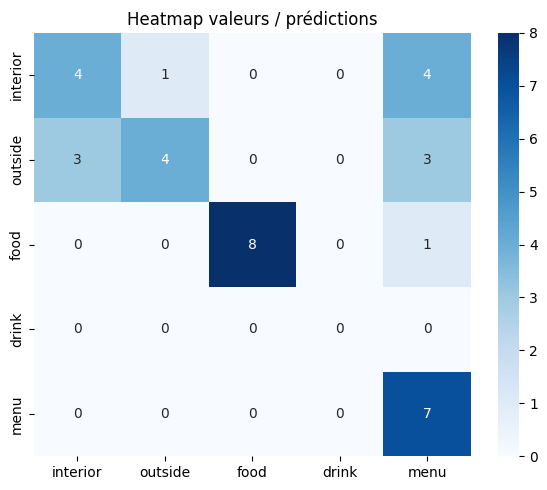

Accuracy : 0.6571428571428571


In [167]:
# Affichage de la heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat_heatmap, annot=True, cmap="Blues", fmt='g')
plt.title('Heatmap valeurs / prédictions')  # Titre

# Ajuster les espacements entre les sous-graphiques
plt.tight_layout()

# Afficher les graphiques
plt.show()

print("Accuracy :", accuracy_score(y_true, y_pred))


Nous allons afficher cette <span style = "color : blue">matrice de confusion</span> sous forme <span style = "color : blue">d'heatmap</span> afin d'avoir un meilleur visuel.

Nous pouvons voir quelques <span style = "color : blue">confusions</span> du modèle surement due à des <span style = "color : blue">"mélanges"</span> (une boisson à l'intérieur predit drink et non inside, un exterieur confondu avec un interieur ou inversement, ...). Nous pourrions essayer <span style = "color : blue">d'étudier plus en détail</span> ces perturbations (nottament grâce à la feature importance que nous allons voir dans la prochaine partie) mais ce n'est <span style = "color : blue">pas le but du projet</span>.

Observons <span style = "color : blue">l'accuracy</span> de notre test:

In [135]:
print("Accuracy :", accuracy_score(y_true, y_pred))

Accuracy : 0.8


Nous avons une <span style = "color : blue">bonne accuracy</span>, ce sera suffisant pour notre baseline.

<a name="C9"><h2><span style = "color : blue">III - Feature Importance</span></h2></a>

Dans notre contexte, nous allons étudier deux types de <span style = "color : blue">Feature Importance</span>:

- La Feature Importance <span style = "color : blue">Globale</span>
- La Feature Importance <span style = "color : blue">Locale</span>

<h3><span style = "color : darkgreen">1 - Feature Importance Globale</span></h3>

La <span style = "color : blue">feature importance globale</span> se réfère à l'importance des features dans <span style = "color : blue">l'ensemble du modèle</span>, sur <span style = "color : blue">l'ensemble du jeu de données</span>. Dans un modèle de <span style = "color : blue">classification d'images</span>, nous pouvons la calculer de différentes manières. Dans notre cas, nous utiliserons une métrique courante qui évalue l'impact des poids des couches du modèle : <span style = "color : blue">l'importance des poids de réseau</span> (network weight importance).
    
<h3><span style = "color : darkorange">Définition du Network Weight Importance</span></h3>

Le <span style = "color : blue">network weight importance</span> est une <span style = "color : blue">métrique</span> qui évalue <span style = "color : blue">l'impact ou la contribution de chaque poids dans le réseau neuronal</span>. Cette métrique est utilisée pour déterminer <span style = "color : blue">quels poids ont le plus d'influence</span> sur la performance du modèle. Voici une formule simplifiée pour l'importance des poids d'une couche donnée:

$ Importance = \sum_{i, j} \lvert w_{i, j} \rvert$, où : $w_{i,j}$ représente le <span style = "color : blue">poids</span> à la <span style = "color : blue">position</span> $(i, j)$ de la couche.

Nous <span style = "color : blue">itérons à travers les poids</span> de cette couche, nous <span style = "color : blue">sommons la valeur absolue de chaque poids</span> pour obtenir <span style = "color : blue">l'importance totale des poids</span> de cette couche. Nous allons maintenant calculer <span style = "color : blue">l'importance des poids normalisée</span> de chaque couche de notre modèle.

<h3><span style = "color : darkorange">Mise en place du Network Weight Importance</span></h3>

Nous allons mettre en place le <span style = "color: blue">Network Weight Importance</span>:

In [136]:
def feature_importance_globale(model):
    
    layer_importance = [] # Liste pour stocker l'importance des poids de chaque couche
    for layer in model.layers:# Parcours les couches du modèle
        if hasattr(layer, 'get_weights') and layer.get_weights(): # Vérifie si layer.get_weights() retourne quelque chose
            weights = layer.get_weights() # récupère les poids
            layer_importance.append(reduce_sum(tensorflow.abs(weights[0])).numpy()) # Calcule l'importance des poids de cette couche
        
    normalized_importance = [round(imp / sum(layer_importance), 4) for imp in layer_importance] # Normalise et arrondis l'importance

    # Affichage de l'Importance
    for i, layer in enumerate(model.layers):
        if hasattr(layer, 'get_weights') and layer.get_weights():
            print(f"Couche_{i} : {layer.__class__.__name__}, Importance : {normalized_importance.pop(0)}")

Nous allons calculer <span style = "color: blue">l'importance des couches</span>:

In [137]:
#feature_importance_globale(load_model("modeles/VGG16_baseline.h5", compile = False))
feature_importance_globale(load_model(checkpoint_filepath, compile = False))

Couche_1 : Conv2D, Importance : 0.0003
Couche_2 : Conv2D, Importance : 0.001
Couche_4 : Conv2D, Importance : 0.0014
Couche_5 : Conv2D, Importance : 0.0021
Couche_7 : Conv2D, Importance : 0.0032
Couche_8 : Conv2D, Importance : 0.0048
Couche_9 : Conv2D, Importance : 0.0049
Couche_11 : Conv2D, Importance : 0.0079
Couche_12 : Conv2D, Importance : 0.0124
Couche_13 : Conv2D, Importance : 0.0129
Couche_15 : Conv2D, Importance : 0.0142
Couche_16 : Conv2D, Importance : 0.0147
Couche_17 : Conv2D, Importance : 0.0141
Couche_20 : Dense, Importance : 0.6967
Couche_21 : Dense, Importance : 0.2091
Couche_22 : Dense, Importance : 0.0003


Nous pouvons constater que les couches les plus <span style = "color : blue">importantes</span> sont <span style = "color : blue">situées vers la fin</span> du modèle (surtout les couches fully-connected).

<h3><span style = "color : darkgreen">2 - Feature Importance Locale</span></h3>

La <span style = "color : blue">feature importance locale</span> correspond à <span style = "color : blue">l'importance des features</span> à <span style = "color : blue">l'intérieur d'une image</span>. Cela signifie qu'elle <span style = "color : blue">identifie les régions</span> de l'image qui ont eu le <span style = "color : blue">plus d'influence sur la prédiction</span> finale du modèle. Dans notre cas, nous allons utiliser la technique <span style = "color : blue">"Grad-CAM"</span> (Gradient-weighted Class Activation Mapping) qui permet de <span style = "color : blue">rétropropager les gradients</span> à travers le modèle pour <span style = "color : blue">identifier ces régions</span> dans une image.

<h3><span style = "color : darkorange">Définition du Gradient-weighted Class Activation Mapping</span></h3>

La méthode <span style = "color : blue">Grad-CAM</span> est une <span style = "color : blue">technique de visualisation</span> qui permet d'identifier quelles parties de l'image ont le <span style = "color : blue">plus contribués à la prédiction</span> du modèle. Voici les étapes à suivre:

- <span style = "color : blue">Choix de l'image et du modèle</span>: Tout d'abord, nous <span style = "color : blue">choisissons une image</span> que nous souhaitons <span style = "color : blue">analyser</span>. Nous choisissons ensuite notre <span style = "color : blue">modèle</span> pour <span style = "color : blue">extraire les features</span> de l'image.
<br>

- <span style = "color : blue">Calcul des gradients</span> : Nous <span style = "color : blue">calculons les gradients de la prédiction par rapport aux à la sortie de la dernière couche convolutionnelle</span> par backpropagation. Ces gradients sont <span style = "color : blue">importants</span> car ils indiquent comment <span style = "color : blue">chaque activation</span> (sorties des canaux individuels) de la <span style = "color : blue">dernière couche convolutionnelle</span> contribue à la <span style = "color : blue">prédiction</span> du modèle.
<br>

- <span style = "color : blue">Calcul du poids des activations</span>: Nous calculons le <span style = "color : blue">poids des activations</span> en effectuant une <span style = "color : blue">moyenne spatiale des gradients</span>. Cela permet de <span style = "color : blue">pondérer l'importance de chaque canal</span> de la dernière couche convolutionnelle.
<br>

- <span style = "color : blue">Calcul du Grad-CAM</span> : Nous calculons le <span style = "color : blue">Grad-CAM</span> en <span style = "color : blue">multipliant les poids des activations</span> avec les <span style = "color : blue">activations de la dernière couche convolutionnelle</span>, puis en prenant la <span style = "color : blue">somme</span>. Nous appliquons une <span style = "color : blue">fonction ReLU</span> pour éliminer les valeurs négatives. Cela donne une <span style = "color : blue">Grad-CAM Map</span> qui met en évidence les <span style = "color : blue">régions de l'image qui ont contribué le plus à la prédiction</span> du modèle.
<br>

- <span style = "color : blue">Normalisation et redimensionnement du Grad-CAM</span> : Nous allons <span style = "color : blue">normaliser</span> et <span style = "color : blue">redimensionner</span> le Grad-CAM que nous allons <span style = "color : blue">superposer</span> à l'image de base pour l'affichage.


<h3><span style = "color : darkorange">Mise en place du Grad-CAM</span></h3>

Nous allons mettre en place le <span style = "color: blue">**Grad-CAM**</span>:

In [138]:
# chat correction

def feature_importance_locale(model, i):
    # Choix de l'image
    img = np.expand_dims(X_test[i], axis=0)  # Choix de l'image
    img_RGB = array_to_img(cv2.cvtColor(img[0], cv2.COLOR_BGR2RGB))  # Image choisie en RGB

    # Création du modèle qui retourne la dernière couche de convolution et la prédiction de notre VGG16_baseline
    heatmap_model = Model(inputs=[model.inputs], outputs=[model.get_layer('block5_conv3').output, model.output])

    # Calcul des Gradients
    with GradientTape() as tape:  # Utilise GradientTape pour calculer les gradients
        last_conv_output, preds = heatmap_model(img)  # Récupère les outputs du heatmap_model
        preds = preds[0]  # Accéder au tensor
        label_index = np.argmax(preds.numpy())  # Récupère l'index de la prédiction
        label_pred = preds[:, label_index]  # Utilise l'index pour récupérer la valeur prédite

    grads = tape.gradient(label_pred, last_conv_output)  # Calcule les gradients de label_pred par rapport à conv_output

    # Calcul du poids des activations
    pooled_grads = reduce_mean(grads, axis=(0, 1, 2))  # Poids des activations

    # Calcul du Grad-CAM
    gradcam = reduce_sum(multiply(pooled_grads, last_conv_output), axis=-1)
    gradcam = np.maximum(gradcam, 0)  # ReLU

    # Transformations du Grad-CAM
    gradcam_normalized = gradcam / np.max(gradcam)  # Normalisation entre 0 et 1
    gradcam_normalized = (gradcam_normalized[0] * 255).astype(np.uint8)  # Normalise le Grad-CAM de 0-1 à 0-255
    gradcam_colored = cv2.applyColorMap(gradcam_normalized, cv2.COLORMAP_COOL)  # Colore le Grad-CAM
    gradcam_resized = cv2.resize(gradcam_colored, (224, 224))  # Redimensionne le Grad-CAM à la taille de l'image

    # Affichage
    superposed_image = Image.blend(img_RGB, array_to_img(gradcam_resized), alpha=0.5)  # Superposition de l'image et du Grad-CAM 
    images = [img_RGB, gradcam_normalized, gradcam_resized, superposed_image]  # Liste des images à afficher
    images_names = ["image originale", "heatmap", "heatmap à l'échelle", "image + heatmap"]  # Noms associés aux images

    # Créer une figure avec une grille 1 x 4 de subplots
    fig, axes = plt.subplots(1, 4, figsize=(12, 5))

    # Parcours les subplots pour afficher chaque image
    for j, ax in enumerate(axes.ravel()):
        ax.imshow(images[j])  # Affiche image
        ax.axis("off")  # Enlève les axes
        ax.set_title(images_names[j])  # Titre

    # Affiche la grille d'images
    plt.tight_layout()
    plt.show()

Nous allons <span style = "color: blue">afficher des images</span>, leurs <span style = "color: blue">heatmaps Grad-CAM</span> et <span style = "color: blue">la fusion des deux</span>

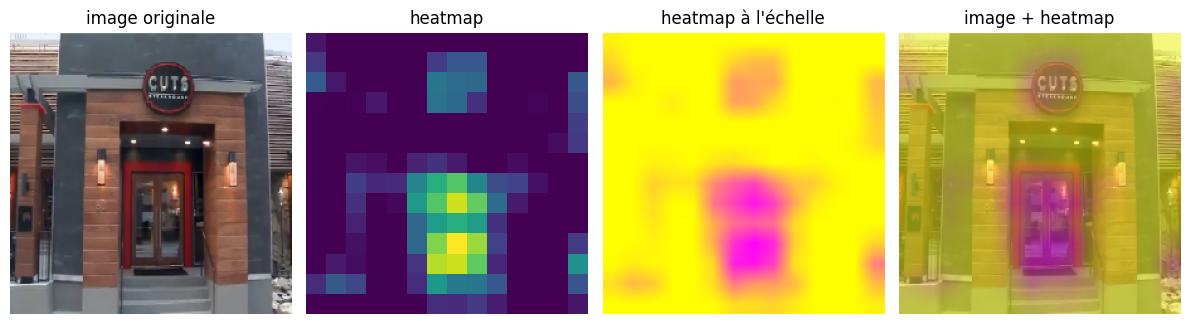

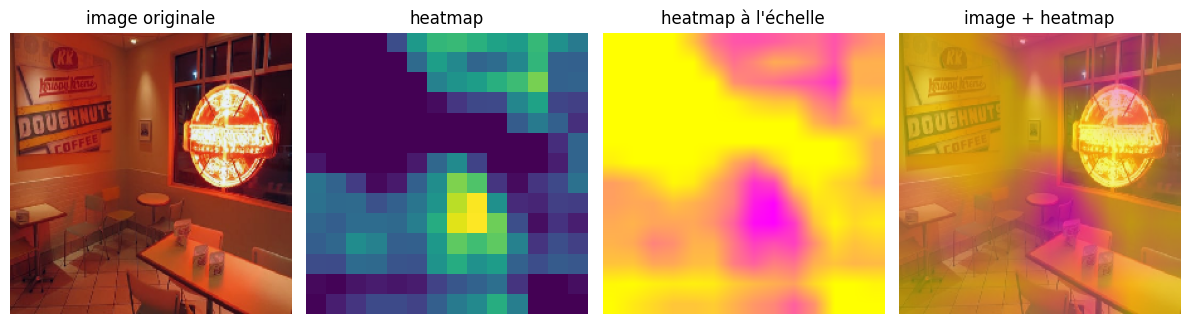

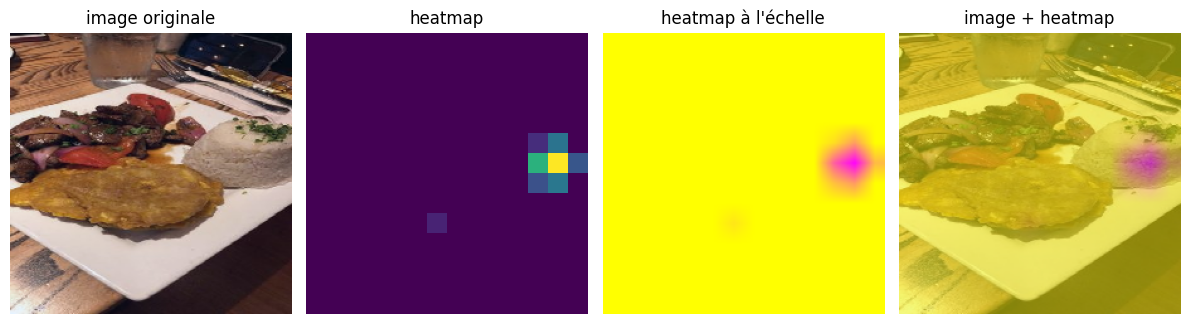

In [139]:
for _ in range(3):
    model = load_model("modeles/VGG16_baseline.keras", compile=False)
    index = np.random.choice(len(X_test))  # Choisissez un index valide
    feature_importance_locale(model, index)

Nous pouvons observer <span style = "color : blue">quelles parties des images</span> ont le <span style = "color : blue">plus contribués à la prédiction</span> du modèle.

<a name="C10"><h1><big><span style = "color : #BB0B0B">Partie 3 : Modèle VGG16 face aux Attaques Adverses</span></big></h1></a>

<big>Dans cette partie, nous allons voir le <span style = "color: #7F00FF">**concept des attaques adverses**</span>, mettre en place une <span style = "color: #7F00FF">**technique**</span> que nous <span style = "color: #7F00FF">**testerons**</span> sur nôtre modèle pour évaluer sa <span style = "color: #7F00FF">**robustesse**</span>.</big>

<a name="C11"><h2><big><span style = "color : blue">I - Concept des Attaques Adverses</span></big></h2></a>

<big>Nous allons étudier le <span style = "color: #7F00FF">**concept des attaques adverse**</span>, nous allons <span style = "color: #7F00FF">**les définir**</span>, voir les <span style = "color: #7F00FF">**différentes approches**</span> puis quelles <span style = "color: #7F00FF">**techniques**</span> sont utilisées.</big>

<h3><big><span style = "color : darkgreen">1 - Définition des Attaques Adverses</span></big></h3>

<big>Dans le cadre de la classification d'images, une <span style = "color: #7F00FF">**attaque adverse**</span> est une technique utilisée pour <span style = "color: #7F00FF">**tromper un modèle de machine learning**</span>, généralement un réseau de neurones profonds (CNN). Voici une <span style = "color: #7F00FF">**explication simplifiée**</span> de la manière dont fonctionne une attaque adverse dans le cadre de la <span style = "color: #7F00FF">**classification d'images**</span> :</big>

<h3><big><span style = "color : darkorange">Perturbation subtile sur l'image d'entrée</span></big></h3>

<big>L'attaquant dispose d'une <span style = "color: #7F00FF">**image d'entrée**</span> qu'il souhaite <span style = "color: #7F00FF">**manipuler pour induire en erreur**</span> la prédiction du modèle. Il ajoute subtilement des <span style = "color: #7F00FF">**perturbations**</span> ou des <span style = "color: #7F00FF">**altérations**</span> qui sont conçues pour être <span style = "color: #7F00FF">**imperceptibles à l'œil humain**</span>. Le but est que l'image modifiée <span style = "color: #7F00FF">**semble presque identique**</span> à l'originale pour un observateur humain.</big>

<h3><big><span style = "color : darkorange">Objectif de l'attaquant : une prédiction erronée</span></big></h3>

<big>L'image <span style = "color: #7F00FF">**modifiée**</span> est présentée au modèle de classification. En raison des <span style = "color: #7F00FF">**perturbations**</span> ajoutées, le modèle peut maintenant <span style = "color: #7F00FF">**donner une prédiction incorrecte**</span> par rapport au label réel de l'image. L'attaquant peut chercher à perturber le modèle de deux manières :</big>

- <big><span style = "color: #7F00FF">**Attaque non ciblée**</span> : faire des erreurs sur un grand nombre d'images</big>
- <big><span style = "color: #7F00FF">**Attaque ciblée**</span> : classer spécifiquement l'image donnée dans une catégorie incorrecte.</big>

<big>L'attaquant mesure <span style = "color: #7F00FF">**le succès de son attaque**</span> en évaluant si le modèle a fait une <span style = "color: #7F00FF">**prédiction erronée**</span> sur l'image modifiée. Si l'attaque réussit, cela signifie que le modèle est <span style = "color: #7F00FF">**vulnérable aux attaques adverses**</span>.</big>

<h3><big><span style = "color : darkorange">Utilisation et défense des Attaques Adverses</span></big></h3>

<big>Les attaques adverses peuvent être <span style = "color: #7F00FF">**utilisées à diverses fins**</span> :</big>
    
- <big><span style = "color: #7F00FF">**Évaluer la robustesse**</span> des modèles de machine learning</big>
- <big><span style = "color: #7F00FF">**Contourner les systèmes de sécurité**</span> basés sur la vision par ordinateur</big>
- <big><span style = "color: #7F00FF">**Brouiller la détection**</span> automatisée d'images inappropriées sur les réseaux sociaux</big>

<big>Pour se défendre contre les attaques adverses, les chercheurs développent des <span style = "color: #7F00FF">**techniques de régularisation**</span>, de <span style = "color: #7F00FF">**re-formation**</span>, de <span style = "color: #7F00FF">**renforcement de la sécurité**</span> des modèles, ainsi que des <span style = "color: #7F00FF">**méthodes de détection**</span> pour identifier les images manipulées.</big>

<h3><big><span style = "color : darkgreen">2 - Approches d'Attaques Adverses</span></big></h3>

<big>En matière d'attaques adverses, nous avons <span style = "color: #7F00FF">**deux approches**</span>, une approche <span style = "color: #7F00FF">**"boîte noire"**</span> (black-box) et une approche <span style = "color: #7F00FF">**"boîte blanche"**</span> (white-box) la différence entre ces deux approches réside dans le <span style = "color: #7F00FF">**niveau d'information**</span> que l'attaquant possède sur le modèle de machine learning qu'il tente de manipuler.</big>

<img src = "img_notebook/BBWB.jpeg" width = 50% height = 40%>

<h3><big><span style = "color : darkorange">Boîte Noire (Black-Box)</span></big></h3>

<big>Dans une approche <span style = "color: #7F00FF">**boîte noire**</span>, l'attaquant ne <span style = "color: #7F00FF">**dispose que d'un accès limité**</span>, voire <span style = "color: #7F00FF">**aucune connaissance**</span> sur les <span style = "color: #7F00FF">**détails internes**</span> du modèle qu'il cible.</big>
   
<big>Pour générer des attaques adverses, l'attaquant connaît en général seulement <span style = "color: #7F00FF">**l'interface d'entrée-sortie**</span> du modèle. Il peut utiliser des <span style = "color: #7F00FF">**méthodes basées sur des observations externes**</span>, telles que <span style = "color: #7F00FF">**l'observation des prédictions**</span> du modèle en réponse à différentes entrées, et tenter de <span style = "color: #7F00FF">**deviner les perturbations nécessaires**</span> pour induire des erreurs. Les attaques boîte noire peuvent être plus <span style = "color: #7F00FF">**difficiles à mener à bien**</span> que les attaques boîte blanche, car l'attaquant dispose de <span style = "color: #7F00FF">**moins d'informations**</span>.</big>

<h3><big><span style = "color : darkorange">Boîte Blanche (White-Box)</span></big></h3>

<big>Dans une approche boîte blanche, l'attaquant a une <span style = "color: #7F00FF">**connaissance complète du modèle**</span> qu'il cible. Cela signifie qu'il connaît <span style = "color: #7F00FF">**l'architecture du modèle**</span>, les <span style = "color: #7F00FF">**poids des neurones**</span>, les <span style = "color: #7F00FF">**fonctions d'activation**</span>, les <span style = "color: #7F00FF">**hyperparamètres**</span>, et <span style = "color: #7F00FF">**toutes les informations internes**</span> du modèle.</big>

<big>L'attaquant peut utiliser cette <span style = "color: #7F00FF">**connaissance approfondie**</span> pour <span style = "color: #7F00FF">**générer des attaques adverses**</span> de manière plus <span style = "color: #7F00FF">**efficace**</span> et <span style = "color: #7F00FF">**précise**</span>. Il peut calculer les <span style = "color: #7F00FF">**gradients de la fonction de loss**</span> par rapport à l'image d'entrée, ce qui peut être utilisé pour <span style = "color: #7F00FF">**déterminer les perturbations optimales**</span> à ajouter à l'image. Cela rend souvent les attaques boîte blanche plus <span style = "color: #7F00FF">**puissantes**</span> et plus <span style = "color: #7F00FF">**susceptibles de réussir**</span> que les attaques boîte noire.</big>

<h3><big><span style = "color : darkgreen">3 - Méthodes d'Attaques Adverses</span></big></h3>

<big>Il existe <span style = "color: #7F00FF">**plusieurs méthodes**</span> pour réaliser des <span style = "color: #7F00FF">**attaques adverses**</span>, notamment :</big>

- <big><span style = "color: #7F00FF">**L'attaque par perturbation de l'image**</span> (image perturbation attack)</big>
- <big><span style = "color: #7F00FF">**L'attaque par ajout de bruit**</span> (noise injection attack)</big>
- <big><span style = "color: #7F00FF">**L'attaque par masquage**</span> (masking attack)</big>

<h3><big><span style = "color : darkorange">Exemples des méthodes d'attaques adverses</span></big></h3>

<big>Voici les <span style = "color: #7F00FF">**méthodes d'Attaques Adverses**</span> les plus <span style = "color: #7F00FF">**couramment utilisées**</span> :</big>

- <big><span style = "color: #7F00FF">**Fast Gradient Sign Method**</span> (FGSM)</big>
- <big><span style = "color: #7F00FF">**Iterative FGSM**</span> (I-FGSM)</big>
- <big><span style = "color: #7F00FF">**Attaques basées sur la boîte noire**</span></big>
- <big><span style = "color: #7F00FF">**Attaques basées sur la génération de perturbations**</span></big>

<h3><big><span style = "color : darkorange">Défenses contre les Attaques Adverses</span></big></h3>

<big>En réponse à ces attaques, il existe <span style = "color: #7F00FF">**des méthodes de défense**</span> visant à rendre les modèles de machine learning plus <span style = "color: #7F00FF">**robustes**</span> aux attaques adverses. Cela peut inclure la <span style = "color: #7F00FF">**régularisation**</span>, la <span style = "color: #7F00FF">**réévaluation**</span> fréquente du modèle, <span style = "color: #7F00FF">**l'entraînement sur des données adversaires**</span>, etc.</big>

<big>Les méthodes d'attaques adverses sont un <span style = "color: #7F00FF">**domaine de recherche actif**</span> en machine learning et en sécurité informatique, car elles soulèvent des <span style = "color: #7F00FF">**questions cruciales**</span> de <span style = "color: #7F00FF">**sécurité**</span> et de <span style = "color: #7F00FF">**robustesse**</span> des modèles. Les chercheurs travaillent à la fois sur la <span style = "color: #7F00FF">**création de méthodes d'attaque plus sophistiquées**</span> et sur le <span style = "color: #7F00FF">**développement de défenses plus efficaces**</span> pour contrer ces attaques.</big>

<h3><big><span style = "color : darkgreen">2 - Mise en place du FGSM</span></big></h3>

<big>Nous allons mettre en place la méthode <span style = "color: #7F00FF">**FGSM**</span>. Commençons par créer une fonction qui <span style = "color: #7F00FF">**calcule le gradient**</span> et retourne le <span style = "color: #7F00FF">**signe de chaque composantes**</span>. Ce qui correspond à la dernière partie de la formule.</big>

In [140]:
# Fonction qui calcule 𝑠𝑖𝑔𝑛(∇x 𝐽(𝜃,𝑋,𝑦))

'''
Calcule 𝜖 ⋅ 𝑠𝑖𝑔𝑛(∇x 𝐽(𝜃,𝑋,𝑦))
    
    Arguments:
        img - tf.Tensor : Image d'entrée 
        y_adv - tf.Tensor : Label de l'image 

    Retours:
        tf.Tensor : signe de chaque composantes du gradient
'''

def sign_grad(img, y_adv, model): 
    loss_object = CategoricalCrossentropy() # Fonction de loss (J)
    
    #Backpropagation du gradient 
    with GradientTape() as tape: 
        tape.watch(img)
        loss = loss_object(y_adv, model(img)) 
    gradient = tape.gradient(loss, img) 
    
    return sign(gradient)

<h3><big><span style = "color : darkgreen">3 - Test d'une attaque adverse</span></big></h3>

<big>Nous allons <span style = "color: #7F00FF">**créer une attaque adverse**</span> afin de tester la fonction.</big>

In [141]:
img = convert_to_tensor(np.expand_dims(X_test[13], axis = 0)) #Image de test
y_adv = convert_to_tensor(np.expand_dims(y_test[13], axis = 0)) #Label de test

epsilon = 0.07 #valeur de epsilon 
gradient = sign_grad(img, y_adv, VGG16_baseline) #gradient de test

# Liste des images sélectionnés
images = [array_to_img(cv2.cvtColor(np.array(img[0]), cv2.COLOR_BGR2RGB)), # Conversion BGR --> RGB
          array_to_img(cv2.cvtColor(np.array(gradient[0]), cv2.COLOR_BGR2RGB)), # Conversion BGR --> RGB
          array_to_img(cv2.cvtColor(np.array((img + epsilon * gradient)[0]), cv2.COLOR_BGR2RGB))] # Conversion BGR --> RGB

# Label associés aux images 
label_images = ["image", "sign(gradient)", "image + attaque adverse"]

<big>Nous allons maintenant <span style = "color: #7F00FF">**afficher l'image originale**</span>, suivi de la <span style = "color: #7F00FF">**perturbation**</span> puis de <span style = "color: #7F00FF">**l'image adverse**</span> afin d'avoir un visuel.</big>

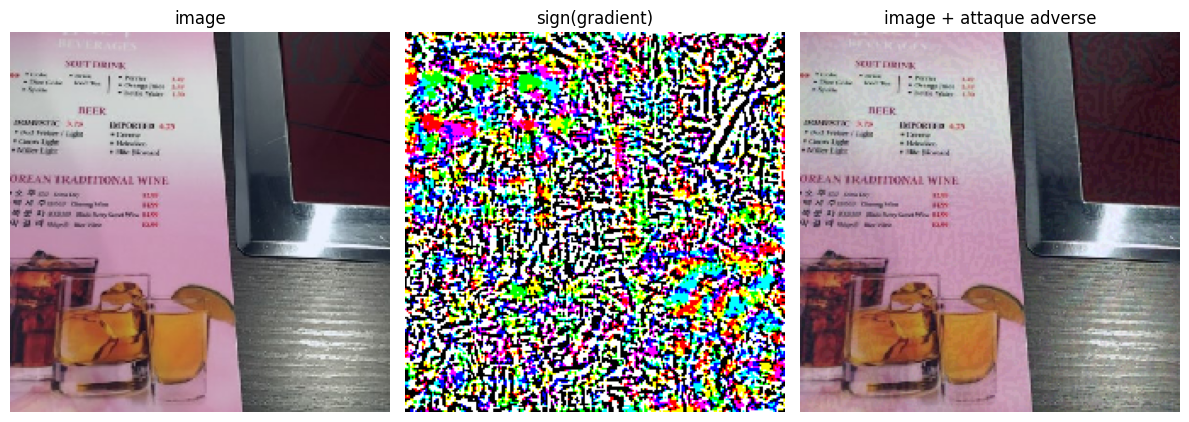

In [142]:
# Créer une figure avec une grille 5 x 3 de subplots
fig, axes = plt.subplots(1, 3, figsize = (12, 5))

# Parcours les subplots pour afficher chaque image
for i, ax in enumerate(axes.ravel()):
    ax.imshow(images[i]) # Affiche image
    ax.set_title(label_images[i]) # Titre
    ax.axis("off") # Enlève les axes

# Affiche la grille d'images
plt.tight_layout()
plt.show()

<big>La différence entre les images est bien <span style = "color: #7F00FF">**presque imperceptible à l'œil humain**</span>, Voyons ce que notre modèle prédit :</big>

In [143]:
true = np.argmax(y_test[13])
pred = np.argmax(VGG16_baseline.predict(img + epsilon * gradient))

print(f"\n Le modèle prédit : '{id2label[pred]}' alors que la vraie catégorie est : '{id2label[true]}'")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 447ms/step

 Le modèle prédit : 'menu' alors que la vraie catégorie est : 'interior'


<h3><big><span style = "color : darkgreen">4 - Prédictions du modèle face aux Attaques Adverses</span></big></h3>

<big>Nous allons effectuer une <span style = "color: #7F00FF">**attaque adverse**</span> sur <span style = "color: #7F00FF">**chaque image de notre test set**</span> afin d'évaluer la perturbation :</big>

In [144]:
y_pred_adv = [] # Liste des labels 
epsilon = 0.07 # Valeur de espilon

for i in range(len(X_test)): # Itère sur les images
        img = convert_to_tensor(np.expand_dims(X_test[i], axis = 0)) #Images de X_test
        y_adv = convert_to_tensor(np.expand_dims(y_test[i], axis = 0)) #Labels de X_test
        gradient = sign_grad(img, y_adv, VGG16_baseline) # Gradients de X_test
        y_pred_adv.append(VGG16_baseline.predict(img + epsilon * gradient)) # Ajoute la prédiction de l'image adverse
        
#Prédiction des valeurs
y_pred_adv = [np.argmax(value) for value in y_pred_adv]

#Vraies valeurs 
y_true = [np.argmax(value) for value in y_test]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 422ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 332ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 307ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 423ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 462ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 314ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 301ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

<h3><big><span style = "color : darkorange">Matrice de confusion</span></big></h3>

<big>Nous allons créer une <span style = "color : #7F00FF">**matrice de confusion**</span> afin d'étudier la similarité des prédictions avec les vraies valeurs.</big>

In [145]:
# Labels pour confusion_matrix
labels = list(label2id.values())

# Création matrice de confusion
conf_mat = confusion_matrix(y_true, y_pred_adv, labels=labels) #Création matrice de confusion

# Création du DataFrame pour la heatmap
conf_mat_heatmap = pd.DataFrame(conf_mat, index = label2id.keys(), columns=label2id.keys()) #Création DataFrame

<big>Nous allons afficher cette <span style = "color : #7F00FF">**matrice de confusion**</span> sous forme <span style = "color : #7F00FF">**d'heatmap**</span> afin d'avoir un meilleur visuel.</big>

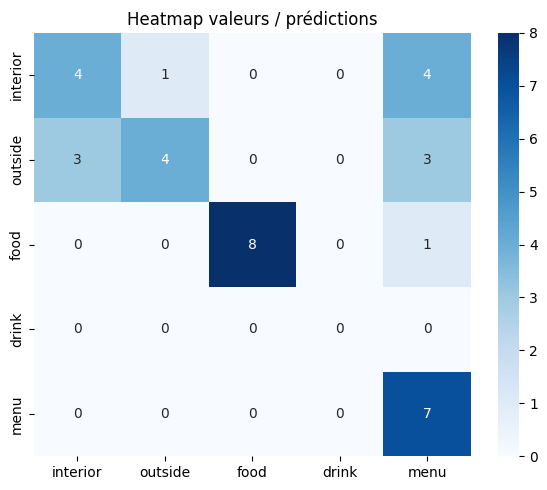

In [166]:
plt.figure(figsize = (6, 5))

# Première heatmap
sns.heatmap(conf_mat_heatmap, annot = True, cmap = "Blues", fmt='g')
plt.title('Heatmap valeurs / prédictions') # Titre

# Ajuste les espacements entre les sous-graphiques
plt.tight_layout()

# Affiche les graphiques
plt.show()

Nous allons Observer <span style = "color : blue">l'accuracy</span> de notre test:

In [147]:
print("Accuracy :", accuracy_score(y_true, y_pred_adv))

Accuracy : 0.11428571428571428


<big>Nous pouvons remarquer que l'accuracy est vraiment <span style = "color: #7F00FF">**mauvaise**</span>, les attaques adverses sont <span style = "color: #7F00FF">**efficaces**</span> sur notre modèle.</big>

<a name="C13"><h2><big><span style = "color : blue">III - Entrainement du VGG16 contre les Attaques adverses</span></big></h2></a>

<h3><big><span style = "color : darkgreen">1 - Création de données "adverses"</span></big></h3>

<big>Pour contrer ces attaques adverses, nous allons créer des <span style = "color: #7F00FF">**"données adverses"**</span> qui serviront à <span style = "color: #7F00FF">**entrainer**</span> notre modèle.</big>

In [148]:
epsilon = 0.07 # Fixe epsilon
X_train_adv, X_val_adv, X_test_adv = [], [], [] # Création des listes

for i in range(len(X_train)): # Itère sur les données d'entrainement 
    image = convert_to_tensor(np.expand_dims(X_train[i], axis = 0)) # Convertit l'image 
    y_adv = convert_to_tensor(np.expand_dims(y_train[i], axis = 0)) # Convertit le label
    gradient = sign_grad(image, y_adv, VGG16_baseline) # Calcule le sign(gradient)
    X_train_adv.append(np.array((image + epsilon * gradient)[0])) # Ajoute l'attaque adverse
    
for i in range(len(X_val)): # Itère sur les données de validation
    image = convert_to_tensor(np.expand_dims(X_val[i], axis = 0)) # Convertit l'image 
    y_adv = convert_to_tensor(np.expand_dims(y_val[i], axis = 0)) # Convertit le label
    gradient = sign_grad(image, y_adv, VGG16_baseline) # Calcule le sign(gradient)
    X_val_adv.append(np.array((image + epsilon * gradient)[0])) # Ajoute l'attaque adverse
    
for i in range(len(X_test)): # Itère sur les données de test
    image = convert_to_tensor(np.expand_dims(X_test[i], axis = 0)) # Convertit l'image 
    y_adv = convert_to_tensor(np.expand_dims(y_test[i], axis = 0)) # Convertit le label
    gradient = sign_grad(image, y_adv, VGG16_baseline) # Calcule le sign(gradient)
    X_test_adv.append(np.array((image + epsilon * gradient)[0])) # Ajoute l'attaque adverse 
    
print(np.array(X_train_adv).shape, np.array(X_val_adv).shape, np.array(X_test_adv).shape)

(94, 224, 224, 3) (31, 224, 224, 3) (35, 224, 224, 3)


<big>Nous allons <span style = "color : #7F00FF">**fusionner**</span> les images et labels <span style = "color : #7F00FF">**"classiques"**</span> et <span style = "color : #7F00FF">**"adverses"**</span></big>

In [149]:
# Fusionne les images "classiques" et "adverses"
X_train_adv_full = np.concatenate((X_train, np.array(X_train_adv)), axis = 0)
X_val_adv_full = np.concatenate((X_val, np.array(X_val_adv)), axis = 0)

# Transforme en array
X_test_adv = np.array(X_test_adv)

# Fusionne les labels "classiques" et "adverses"
y_train_adv = np.concatenate((y_train, y_train), axis = 0)
y_val_adv = np.concatenate((y_val, y_val), axis = 0)

print(X_train_adv_full.shape, X_val_adv_full.shape)
print(y_train_adv.shape, y_val_adv.shape)

(188, 224, 224, 3) (62, 224, 224, 3)
(188, 5) (62, 5)


<h3><big><span style = "color : darkgreen">2 - Création du modèle</span></big></h3>

<big>Nous allons <span style = "color : #7F00FF">**créer**</span> puis <span style = "color : #7F00FF">**entrainer**</span> le même modèle que précédemment.</big>

In [150]:
vgg = VGG16(weights = "imagenet", include_top = False, input_shape = (224, 224, 3)) # Charge le modèle 

# Gèle les 4 dernières couches
for layer in vgg.layers: 
    layer.trainable = False

x = Flatten()(vgg.output) # Couche Flatten
x = Dense(4096,activation = "relu")(x) # Première couche fully-connected 
x = Dense(4096,activation = "relu")(x) # Deuxième couche fully-connected 
output = Dense(5, activation = "softmax")(x) # Output (Troisième couche fully-connected) 

VGG16_adverse = Model(inputs = vgg.input, outputs = output, name = "VGG16_adverse") # Création du modèle

<big>Nous pouvons observer <span style = "color : #7F00FF">**l'architecture**</span> de ce modèle qui est <span style = "color : #7F00FF">**identique**</span> au modèle précédent :</big>

In [151]:
model.summary()

Model: "VGG16_baseline"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4096)           │   102,764,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4096)           │    16,781,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 5)              │        20,485 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 134,281,029 (512.24 MB)

 Trainable params: 119,566,341 (456.11 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

<h3><big><span style = "color : darkgreen">3 - Entrainement du modèle </span></big></h3>

<big>Nous allons <span style = "color : #7F00FF">**entrainer le modèle**</span> sur nos nouvelles données contenant les images <span style = "color : #7F00FF">**"classiques"**</span> et les images <span style = "color : #7F00FF">**"adverses"**</span>. Nous allons utiliser les <span style = "color : #7F00FF">**même caratéristiques**</span> que précédemment :</big>

- <big><span style = "color : #7F00FF">**Optimizer**</span> : Adam</big>
- <big><span style = "color : #7F00FF">**Loss**</span> : Categorical Crossentropy</big>
- <big><span style = "color : #7F00FF">**Metrics**</span> : Accuracy</big>
- <big><span style = "color : #7F00FF">**Epochs**</span> : 10</big>

In [152]:
checkpoint = ModelCheckpoint(filepath = os.getcwd() + "/modeles/VGG16_adverse.keras", monitor = "val_accuracy",
                             save_best_only = True, mode = "max", save_freq = "epoch")

VGG16_adverse.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = VGG16_adverse.fit(X_train_adv_full, y_train_adv, epochs = 10, validation_data = (X_val_adv_full, y_val_adv), callbacks = [checkpoint])

VGG16_adverse = load_model("modeles/VGG16_adverse.keras", compile = False)

Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 44s 8s/step - accuracy: 0.2931 - loss: 24.3763 - val_accuracy: 0.5000 - val_loss: 3.7691
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 43s 8s/step - accuracy: 0.6863 - loss: 1.4052 - val_accuracy: 0.5161 - val_loss: 1.5416
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 41s 7s/step - accuracy: 0.9096 - loss: 0.2329 - val_accuracy: 0.6290 - val_loss: 1.5302
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - accuracy: 1.0000 - loss: 0.0208 - val_accuracy: 0.6613 - val_loss: 1.5670
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 33s 6s/step - accuracy: 1.0000 - loss: 8.5335e-04 - val_accuracy: 0.5968 - val_loss: 3.1088
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 33s 6s/step - accuracy: 1.0000 - loss: 0.0014 - val_accuracy: 0.6129 - val_loss: 2.4734
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 6s/step - accuracy: 1.0000 - loss: 2.7326e-05 - val_accuracy: 0.5968 - val_loss: 1.8985
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 35s 6s/step - accuracy: 1.0000 - loss: 1.3063e-04 - val_accuracy: 0.6452 - val_loss: 1.

<h3><big><span style = "color : darkgreen">4 - Prédictions du modèle</span></big></h3>

<big>Nous allons maintenant récupérer les <span style = "color : #7F00FF">**valeurs prédites**</span> des données de test et les <span style = "color : #7F00FF">**vraies valeurs**</span> du modèle</big>

In [153]:
#Vraies valeurs
y_true = [np.argmax(value) for value in y_test]

#Valeurs prédites
y_pred = VGG16_adverse.predict(X_test)
y_pred = [np.argmax(value) for value in y_pred]

#Valeurs prédites
y_pred_adv = VGG16_adverse.predict(X_test_adv)
y_pred_adv = [np.argmax(value) for value in y_pred_adv]

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 552ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 505ms/step


<h3><big><span style = "color : darkorange">Matrice de confusion</span></big></h3>

<big>Nous allons créer des <span style = "color : #7F00FF">**matrices de confusions**</span> afin d'étudier la <span style = "color : #7F00FF">**similarité des prédictions**</span> avec les <span style = "color : #7F00FF">**vraies valeurs**</span>.</big>

In [154]:
#Données classiques 
# Labels pour confusion_matrix
labels = list(label2id.values())
# Création matrice de confusion
conf_mat = confusion_matrix(y_true, y_pred, labels=labels)
# Création du DataFrame pour la heatmap
conf_mat_heatmap = pd.DataFrame(conf_mat, index = label2id.keys(), columns=label2id.keys())

#Données adverses 
conf_mat_adv = confusion_matrix(y_true, y_pred_adv, labels=labels)
conf_mat_heatmap_adv = pd.DataFrame(conf_mat_adv, index = label2id.keys(), columns=label2id.keys())

<big>Nous allons afficher ces <span style = "color : #7F00FF">**matrices de confusions**</span> sous forme <span style = "color : #7F00FF">**d'heatmaps**</span> afin d'avoir un meilleur visuel.</big>

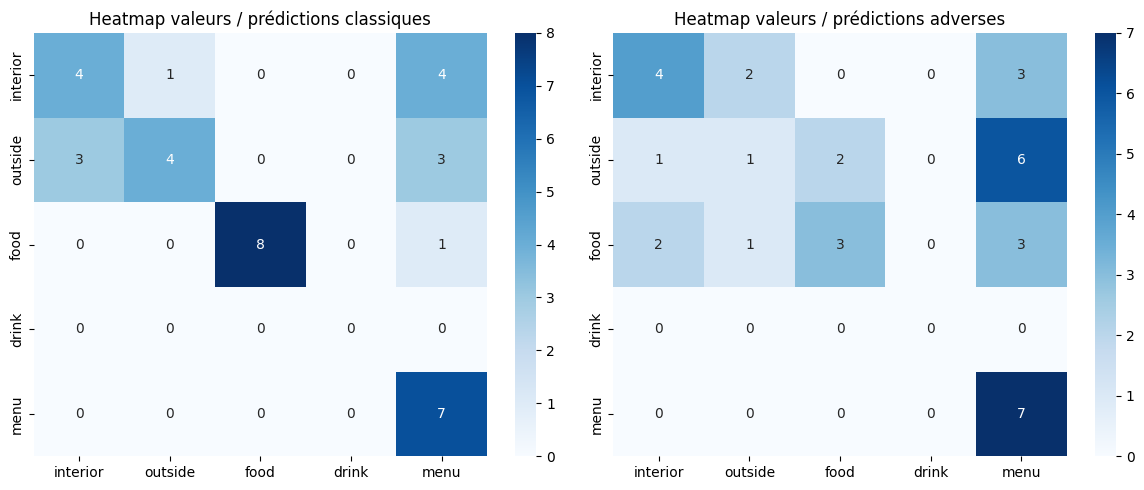

In [155]:
# Créer une figure avec une grille de sous-graphiques 1x2 (1 ligne, 2 colonnes)
fig, axes = plt.subplots(1, 2, figsize = (12, 5))  # 1 ligne, 2 colonnes

# Première heatmap
sns.heatmap(conf_mat_heatmap, annot = True, cmap = "Blues", ax = axes[0], fmt = "g")
axes[0].set_title('Heatmap valeurs / prédictions classiques') # Titre

# Deuxième heatmap
sns.heatmap(conf_mat_heatmap_adv, annot = True, cmap = "Blues", ax = axes[1], fmt = "g")
axes[1].set_title('Heatmap valeurs / prédictions adverses') # Titre

# Ajuste les espacements entre les sous-graphiques
plt.tight_layout()

# Affiche les graphiques
plt.show()

<big>Nous allons Observer <span style = "color : #7F00FF">**les accuracy**</span> de notre test :</big>

In [156]:
print("Accuracy classique:", accuracy_score(y_true, y_pred))
print("Accuracy adverse:", accuracy_score(y_true, y_pred_adv))

Accuracy classique: 0.6571428571428571
Accuracy adverse: 0.42857142857142855


<big>Bien que nous avons une <span style = "color : #7F00FF">**accuracy qui diminue un peu**</span> pour les <span style = "color : #7F00FF">**images "classiques"**</span>, nous avons une <span style = "color : #7F00FF">**bien meilleure accuracy**</span> pour les <span style = "color : #7F00FF">**images "adverses"**</span>.</big>

<big>Nous avons donc <span style = "color : #7F00FF">**améliorer la robustesse**</span> de notre modèle à ces attaques !</big>

<h3><big><span style = "color : darkgreen">5 - Feature Importance</span></big></h3>

<big>Nous allons étudier la Feature Importance <span style = "color : #7F00FF">**Globale**</span> et la Feature Importance <span style = "color : #7F00FF">**Locale**</span></big>

<h3><big><span style = "color : darkorange">Feature Importance Globale</span></big></h3>

<big>Nous allons calculer <span style = "color: #7F00FF">**l'importance des couches**</span> avec le <span style = "color: #7F00FF">**Network Weight Importance**</span> :</big>

In [157]:
feature_importance_globale(load_model("modeles/VGG16_adverse.keras", compile = False))

Couche_1 : Conv2D, Importance : 0.0003
Couche_2 : Conv2D, Importance : 0.0009
Couche_4 : Conv2D, Importance : 0.0013
Couche_5 : Conv2D, Importance : 0.002
Couche_7 : Conv2D, Importance : 0.0031
Couche_8 : Conv2D, Importance : 0.0045
Couche_9 : Conv2D, Importance : 0.0046
Couche_11 : Conv2D, Importance : 0.0075
Couche_12 : Conv2D, Importance : 0.0118
Couche_13 : Conv2D, Importance : 0.0122
Couche_15 : Conv2D, Importance : 0.0135
Couche_16 : Conv2D, Importance : 0.0139
Couche_17 : Conv2D, Importance : 0.0134
Couche_20 : Dense, Importance : 0.7079
Couche_21 : Dense, Importance : 0.2026
Couche_22 : Dense, Importance : 0.0003


<big>Nous pouvons constater que les couches les plus <span style = "color : #7F00FF">**importantes**</span> sont <span style = "color : #7F00FF">**situées vers la fin**</span> du modèle (surtout les couches fully-connected).</big>

<h3><big><span style = "color : darkorange">Feature Importance Locale</span></big></h3>

<big>Nous allons calculer le <span style = "color: #7F00FF">**Grad-CAM**</span> puis, nous allons <span style = "color: #7F00FF">**afficher des images**</span>, <span style = "color: #7F00FF">**leurs heatmaps Grad-CAM**</span> et <span style = "color: #7F00FF">**la fusion des deux**</span></big>

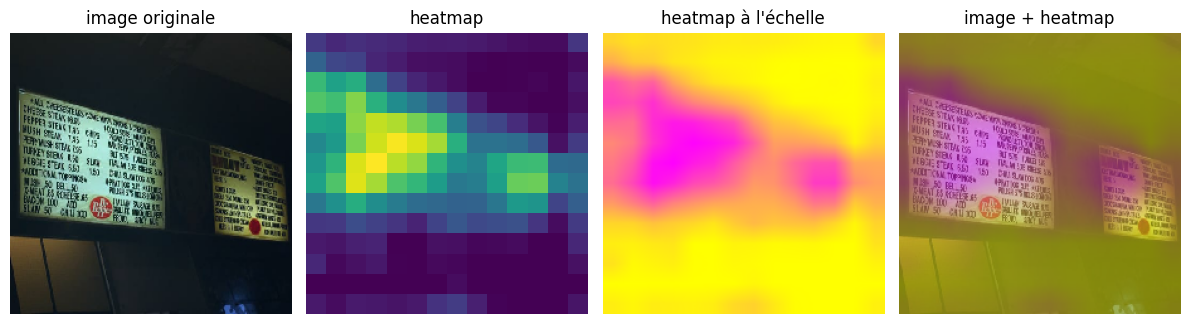

ValueError: A total of 1 objects could not be loaded. Example error message for object <Dense name=dense_6, built=True>:

Unable to allocate 392. MiB for an array with shape (25088, 4096) and data type float32

List of objects that could not be loaded:
[<Dense name=dense_6, built=True>]

In [160]:
for i in range(3):
    model = load_model("modeles/VGG16_adverse.keras", compile = False)
    index = np.random.choice(len(X_test))  # Choisissez un index valide
    feature_importance_locale(model, index)

<big>Nous pouvons observer <span style = "color : #7F00FF">**quelles parties des images**</span> ont le <span style = "color : #7F00FF">**plus contribués à la prédiction**</span> du modèle.</big>

<a name="C14"><center><h2><big><span style = "color : purple">Conclusion : </span></big></h2></center></a>

<big>Nous avons commencé par <span style = "color : #7F00FF">**étudier la possibilité de classifier des images**</span> d'Avis Restau, puis, nous avons <span style = "color : #7F00FF">**créé un modèle de classifcation**</span> permettant cette classification. Nous avons ensuite <span style = "color : #7F00FF">**étudié les attaques adverses**</span> afin de rendre le modèle <span style = "color : #7F00FF">**plus robuste**</span> à celles-ci.</big>

<big>Nous sommes ainsi tombé sur le <span style = "color : #7F00FF">**phénomène de compromis entre la robustesse et la précision**</span> d'un modèle de deep learning lorsqu'il est entraîné avec des <span style = "color : #7F00FF">**"images adverses"**</span>. 

- <big>En effet, le modèle devient <span style = "color : #7F00FF">**plus robuste**</span> face aux attaques adverses, ce qui signifie qu'il est mieux capable de <span style = "color : #7F00FF">**résister aux tentatives de perturbation malveillante**</span> des données d'entrée.</big>
<br>
 
- <big>Cependant, ce gain en robustesse s'accompagne d'une <span style = "color : #7F00FF">**légère baisse de précision**</span> sur les données "classiques", car le modèle peut devenir <span style = "color : #7F00FF">**trop prudent**</span> et <span style = "color : #7F00FF">**classer incorrectement**</span> certaines données "classiques" comme "adverses".</big>
    
<a name="C14"><center><h2><big><span style = "color : purple">Ouverture</span></big></h2></center></a>

<big>Il existe un <span style = "color : #7F00FF">**équilibre à trouver entre la précision et la robustesse**</span> d'un modèle.</big>
    
- <big>Trop d'accent sur la <span style = "color : #7F00FF">**robustesse**</span> peut entraîner une <span style = "color : #7F00FF">**perte de précision**</span> sur les données "classiques"</big>
- <big>Trop d'accent sur la <span style = "color : #7F00FF">**précision**</span> peut rendre le modèle <span style = "color : #7F00FF">**vulnérable aux attaques adverses**</span>.</big>
    
<big>Le défi consiste donc à trouver le <span style = "color : #7F00FF">**juste milieu**</span> qui offre un <span style = "color : #7F00FF">**niveau de robustesse adéquat**</span> tout en maintenant une <span style = "color : #7F00FF">**précision raisonnable**</span> sur les données de base.</big>

<big>Si nous avions <span style = "color : #7F00FF">**plus de temps**</span>, nous pourrions maintenant <span style = "color : #7F00FF">**optmiser ce compromis**</span> tout en <span style = "color : #7F00FF">**testant d'autres variables**</span> (faire varier le `epsilon`) ou d'autres <span style = "color : #7F00FF">**méthodes d'attaques adverses**</span> (`I-FGSM`, par exemple)</big>